<a href="https://colab.research.google.com/github/RubyNixx/Time_Series_And_Regression/blob/main/Regression_and_Time_Series_Analysis_A%26E_Attendances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

I work within the NHS Health Service, in a role where I am responsible for analysing demand & capacity at a regional level. To complete this task I have selected the A&E attendances at a Provider level, and selected measures linked to these Providers (from other hospital datasets) to understand if they have an impact on the number of attendances breaching 4 hours. I also explore if it's possible to predict A&E attendances using historical A&E attendance data.

#References

**Abugaber, D. (n.d.).** Chapter 23: Using ARIMA for Time Series Analysis. [online] ademos.people.uic.edu. Available at: https://ademos.people.uic.edu/Chapter23.html [Accessed 27 December 2024].

**Anon, (n.d.).** The Box-Cox Transformation: What It Is and How to Use It - LeanScape. [online] Available at: https://leanscape.io/the-box-cox-transformation-what-it-is-and-how-to-use-it/.

‌**Box, G.E.P., Jenkins, G.M., Reinsel, G.C. and Ljung, G.M., 2015.** Time series analysis: forecasting and control.

**John Wiley & Sons. Hyndman, R.J. and Athanasopoulos, G., 2018.** Forecasting: principles and practice. 2nd ed. Melbourne, Australia: OTexts.

**John Wiley & Sons. Brownlee, J., 2021.** How to Create an ARIMA Model for Time Series Forecasting in Python. Machine Learning Mastery. [online] Available at: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/ [Accessed 27 December 2024].

**Fuller, W.A., 1976.** Introduction to Statistical Time Series. New York: John Wiley and Sons.

**Hyndman, R.J., 2014. Unit root tests and ARIMA models.** [online] Available at: https://robjhyndman.com/hyndsight/unit-root-tests/ [Accessed 27 December 2024].

**Hyndman, R.J. and Athanasopoulos, G., 2018.** Forecasting: principles and practice. 2nd ed. Melbourne, Australia: OTexts.

Minitab.com. (2024). Modified Box-Pierce (Ljung-Box) Chi-Square statistics ARIMA. [online] Available at: https://support.minitab.com/en-us/minitab/help-and-how-to/statistical-modeling/time-series/how-to/arima/interpret-the-results/all-statistics-and-graphs/modified-box-pierce-ljung-box-chi-square-statistics/ [Accessed 3 Jan. 2025].

‌
**Nau, R., 2004.** Identifying the orders of AR and MA terms in an ARIMA model. [online] Available at: https://people.duke.edu/~rnau/411arim3.htm [Accessed 30 December 2024].

**NHS England (n.d.).** A&E Attendances and Emergency Admissions Monthly Return Definitions. [online] Available at: https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2019/07/AE-Attendances-Emergency-Definitions-v4.0-final-July-2019.pdf [Accessed 27 December 2024].

**OriginLab. (n.d.).** Residual Plot Analysis. Retrieved from https://www.originlab.com/doc/origin-help/residual-plot-analysis

**Randa, R. (n.d.).** AIC/BIC in Model Selection. LinkedIn. Available at: https://www.linkedin.com/pulse/aicbic-model-selection-richard-randa [Accessed 30 Dec. 2024].

**Saadeddin, Z., 2024.** ARIMA for Time Series Forecasting: A Complete Guide. [online] Datacamp.com. Available at: https://www.datacamp.com/tutorial/arima [Accessed 27 December 2024].

**Study.com. (n.d.).** How to Interpret a Residual Plot | Algebra. Retrieved from https://study.com/skill/learn/how-to-interpret-a-residual-plot-explanation.html

**Yoss, A. (2020).** Time Series Seasonal Decomposition. [online] The Startup. Available at: https://medium.com/swlh/time-series-seasonal-decomposition-a300fe0f34dd.

Websites that I used to support modelling:

https://www.datacamp.com/tutorial/arima

https://www.statology.org/q-q-plot-normality/

# Set up

Load python libraries to carry out data wrangling, machine learning & data visualisation tasks on data.

In [796]:
# Package Installation (uncomment if needed)
!pip install pmdarima

# Data Wrangling and Analysis
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import pmdarima as pm
import requests
from bs4 import BeautifulSoup

# Data Visualisation
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math

# Web Scraping and Data Retrieval
import requests
from bs4 import BeautifulSoup
import io

# Date and Time Handling
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Utility and Environment Setup
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML, display
import ipywidgets as widgets
from itertools import product
from tabulate import tabulate

# Additional Libraries
import random

# Data Collection

## Upload Organisation data
Check if below files exist (=file_names) in directory and if not, prompt user to upload:

In [797]:
from google.colab import files
import os

file_names = [
    'Trust_Catchment_Population.xlsx',
    'Trust_Merges.xlsx',
    'IMD_Trust_2020.xlsx'
]

for file_name in file_names:
    if os.path.exists(file_name):
        print(f"The file '{file_name}' already exists in the Colab directory.")
    else:
        print(f"The file '{file_name}' does not exist in the Colab directory.")
        upload = input(f"Would you like to upload '{file_name}'? (yes/no): ").lower()

        if upload == 'yes':
            print(f"Please select the '{file_name}' file to upload:")
            uploaded = files.upload()

            if file_name in uploaded:
                print(f"'{file_name}' has been successfully uploaded.")
            else:
                print(f"Upload of '{file_name}' was cancelled or unsuccessful.")
        else:
            print(f"Upload of '{file_name}' was cancelled.")


The file 'Trust_Catchment_Population.xlsx' already exists in the Colab directory.
The file 'Trust_Merges.xlsx' already exists in the Colab directory.
The file 'IMD_Trust_2020.xlsx' already exists in the Colab directory.


##Store Trust Merges data in dataframe

In [798]:
file_name = 'Trust_Merges.xlsx'

# Read the Trust_Merges.xlsx file
if os.path.exists(file_name):
    trust_merges = pd.read_excel(file_name)
    merge_dict = dict(zip(trust_merges.iloc[:, 0], trust_merges.iloc[:, 1]))
else:
    print(f"Error: {file_name} not found. Proceeding without merge information.")
    merge_dict = {}

In [799]:
# Create a DataFrame from the dictionary
merge_df = pd.DataFrame.from_dict(merge_dict, orient='index', columns=['New Org Code'])
merge_df.reset_index(inplace=True)  # Reset index to convert 'index' into a column
merge_df.rename(columns={'index': 'Old Org Code'}, inplace=True)  # Rename columns for clarity

# Display the initial DataFrame created from the dictionary
print("Initial DataFrame from merge_dict:")
print(merge_df)

Initial DataFrame from merge_dict:
    Old Org Code New Org Code
0            R1E          RRE
1            R1G          RA9
2            R1J          RTQ
3            RB1          RX5
4            RB2          RV1
..           ...          ...
385          RY1          RW4
386          R1C          RW1
387          RA4          RH5
388          RVY          RBN
389          RY9          RAX

[390 rows x 2 columns]


##Store population data in dataframe

In [800]:
file_name = 'Trust_Catchment_Population.xlsx'

# Read the specified columns directly into a DataFrame
population_df = pd.read_excel(file_name, usecols=['TrustCode', 'Population', '65yrplus_Population'])

# Check the data types
print(population_df.dtypes)

# Convert Population and 65yrplus_Population to integers if they are not already
population_df['Population'] = population_df['Population'].astype(int)
population_df['65yrplus_Population'] = population_df['65yrplus_Population'].astype(int)

# Display the DataFrame to verify
print(population_df.head())


TrustCode              object
Population              int64
65yrplus_Population     int64
dtype: object
  TrustCode  Population  65yrplus_Population
0       R0A     4093742               497490
1       R0B     1352136               294359
2       R0D     1675295               436268
3       R1F      359543               106156
4       R1H     3542590               352721


##Store IMD population data in dataframe

In [801]:
import pandas as pd

file_name = 'IMD_Trust_2020.xlsx'

# Read the specified columns directly into a DataFrame
imd_df = pd.read_excel(file_name, usecols=['Trust Code', 'IMD Score', 'Rank (1 is most deprived)'])

# Check the data types
print(imd_df.dtypes)

# Convert Rank and IMD Score to integers if they are not already
imd_df['Rank (1 is most deprived)'] = imd_df['Rank (1 is most deprived)'].astype(int)
imd_df['IMD Score'] = imd_df['IMD Score'].astype(int)

# Change column names: remove special characters and replace spaces with underscores
imd_df.columns = imd_df.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True).str.replace(' ', '_')

# Display the DataFrame to verify changes
print(imd_df.head())


Trust Code                    object
IMD Score                    float64
Rank (1 is most deprived)      int64
dtype: object
  TrustCode  IMDScore  Rank1ismostdeprived
0       R0A        29                   18
1       R0B        31                    5
2       R0D        16                   95
3       R1F        23                   39
4       R1H        24                   38


## Web scrape the A&E attendance data

In [802]:
# List of month-year combinations to exclude
exclude_months = ["December-2024", "January-2025", "February-2025", "March-2025"]
exclude_months_lower = [month.lower() for month in exclude_months]

# List of URLs to scrape
urls = [
    "https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/ae-attendances-and-emergency-admissions-2024-25/",
    "https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/ae-attendances-and-emergency-admissions-2023-24/",
    "https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/ae-attendances-and-emergency-admissions-2022-23/",
    "https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/ae-attendances-and-emergency-admissions-2021-22/",
    "https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/ae-attendances-and-emergency-admissions-2020-21/",
    "https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/ae-attendances-and-emergency-admissions-2019-20/",
    "https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/ae-attendances-and-emergency-admissions-2018-19/",
    "https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/ae-attendances-and-emergency-admissions-2017-18/",
]

# Function to read CSV file from URL and check for excluded months
def read_csv_from_url(file_url):
    response = requests.get(file_url)
    df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
    if 'Period' in df.columns and df['Period'].str.lower().str.contains('|'.join(exclude_months_lower)).any():
        return None
    return df

# Dictionary to store DataFrames
csv_data_imported = {}

# Iterate through each URL
for url in urls:
    print(f"Scraping from: {url}")
    # Send a GET request to the webpage
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all links on the page
    links = soup.find_all('a')

    # Filter links for CSV files that contain 'Monthly-AE'
    csv_links = [link.get('href') for link in links if link.get('href') and
                 link.get('href').lower().endswith('.csv')]

    # Import CSV files
    for link in csv_links:
        try:
            full_link = link if link.startswith('http') else f"https://www.england.nhs.uk{link}"
            df = read_csv_from_url(full_link)
            if df is not None:
                file_name = link.split('/')[-1]  # Extract file name from URL
                csv_data_imported[file_name] = df
                print(f"Successfully imported: {file_name}")
            else:
                print(f"Skipped file (contains excluded months): {link.split('/')[-1]}")
        except Exception as e:
            print(f"Failed to import {link}: {str(e)}")

    print(f"Finished scraping from: {url}\n")

print(f"Total number of CSV files imported: {len(csv_data_imported)}")


Scraping from: https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/ae-attendances-and-emergency-admissions-2024-25/
Successfully imported: Monthly-AE-November-2024-CSV-29KB.csv
Successfully imported: Monthly-AE-October-2024.csv
Successfully imported: Monthly-AE-September-2024.csv
Successfully imported: Monthly-AE-August-2024.csv
Successfully imported: Monthly-AE-July-2024-revised.csv
Successfully imported: Monthly-AE-June-2024.csv
Successfully imported: Monthly-AE-May-2024.csv
Successfully imported: Monthly-AE-April-2024-revised.csv
Finished scraping from: https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/ae-attendances-and-emergency-admissions-2024-25/

Scraping from: https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/ae-attendances-and-emergency-admissions-2023-24/
Successfully imported: March-2024-revised-130624-abcdef123.csv
Successfully imported: February-2024-re

I noted that no files were scraped from the 17/18 page - when checking, there were no csv files on this tab. So i set my start date to 1st April 2018.

The above will advise how many csv files have been imported. I then calculate how many months there are in my reporting period to check that my web scraping import has been successful in getting all the files I expect.

In [803]:
# Calculate how many files I expect to import

# Calculate how many months and years in fin yr to date:
start_date = datetime(2018, 4, 1)
end_date = datetime(2024, 11, 1)

difference = relativedelta(end_date, start_date)

months_between = difference.months + (difference.years * 12)
years_between = difference.years + (difference.months / 12)

print(f"The number of months between April 2018 and November 2024 is: {months_between}")
print(f"The number of years between April 2018 and November 2024 is: {years_between:.2f}")


The number of months between April 2018 and November 2024 is: 79
The number of years between April 2018 and November 2024 is: 6.58


I am confident from the above that the number of csv files imported = the number of months within the reporting period.

In [804]:
#See top rows that have been imported to check it looks as expected

dataframes = csv_data_imported.values()
for df in dataframes:
    print(df.head())
    print("\n" + "="*50 + "\n")


Streaming output truncated to the last 5000 lines.
0                       0                                     0   
1                       0                                     0   
2                       0                                  2014   
3                       0                                     0   
4                       0                                  1344   

   A&E attendances Booked Appointments Type 1  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   A&E attendances Booked Appointments Type 2  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   A&E attendances Book

##Check columns are consistent in all files imported

In [805]:
#Check that all column names match between the imported files

#Create a function that gets the first file in the dictionary as a reference file, then for each file imported check for both missing columns (columns in the reference but not in the current file) and extra columns (columns in the current file but not in the reference).

#Stores the differences in a dictionary, keyed by file name and if inconsistencies are found, prints the reference file name & its columns, and then any missing columns or extra columns.

def check_columns_consistency(csv_data_imported):
    if not csv_data_imported:
        print("No CSV files imported.")
        return

    reference_file = next(iter(csv_data_imported))
    reference_columns = set(csv_data_imported[reference_file].columns)
    inconsistent_files = {}

    for file_name, df in csv_data_imported.items():
        current_columns = set(df.columns)
        if current_columns != reference_columns:
            missing_columns = reference_columns - current_columns
            extra_columns = current_columns - reference_columns
            inconsistent_files[file_name] = {
                'missing': missing_columns,
                'extra': extra_columns
            }

    if not inconsistent_files:
        print("All files have consistent columns and headings.")
    else:
        print(f"Reference file: {reference_file}")
        print(f"Reference columns: {sorted(reference_columns)}\n")
        print("Files with inconsistent columns:")
        for file, differences in inconsistent_files.items():
            print(f"\n{file}:")
            if differences['missing']:
                print("  Missing columns:")
                for col in sorted(differences['missing']):
                    print(f"    - {col}")
            if differences['extra']:
                print("  Extra columns:")
                for col in sorted(differences['extra']):
                    print(f"    - {col}")

# Call the function after importing the CSV files
check_columns_consistency(csv_data_imported)


Reference file: Monthly-AE-November-2024-CSV-29KB.csv
Reference columns: ['A&E attendances Booked Appointments Other Department', 'A&E attendances Booked Appointments Type 1', 'A&E attendances Booked Appointments Type 2', 'A&E attendances Other A&E Department', 'A&E attendances Type 1', 'A&E attendances Type 2', 'Attendances over 4hrs Booked Appointments Other Department', 'Attendances over 4hrs Booked Appointments Type 1', 'Attendances over 4hrs Booked Appointments Type 2', 'Attendances over 4hrs Other Department', 'Attendances over 4hrs Type 1', 'Attendances over 4hrs Type 2', 'Emergency admissions via A&E - Other A&E department', 'Emergency admissions via A&E - Type 1', 'Emergency admissions via A&E - Type 2', 'Org Code', 'Org name', 'Other emergency admissions', 'Parent Org', 'Patients who have waited 12+ hrs from DTA to admission', 'Patients who have waited 4-12 hs from DTA to admission', 'Period']

Files with inconsistent columns:

Monthly-AE-September-2024.csv:
  Extra columns:


In the above, I can see that the Monthly-AE-September-2024.csv file is inconsistent with the expected file format. When opening that csv file, I found that there was an 'a' character in column AB which has caused 5 blank columns to be created, then a column called 'a'.

There are also columns missing in earlier versions of this file that are present in the more recent files. On review of the schema, i found that these columns were added as an addition. I've therefore decided to drop these columns and focus on A&E Attendances Type 1 as these have been consistently reported and form part of the main emergency department with resus facilities.

To resolve this, i've cleaned the September 2024 file below. & then checked again for column consistency.

In [806]:
    reference_file = next(iter(csv_data_imported))
    reference_columns = set(csv_data_imported[reference_file].columns)

print(f"Reference columns: {sorted(reference_columns)}\n")

Reference columns: ['A&E attendances Booked Appointments Other Department', 'A&E attendances Booked Appointments Type 1', 'A&E attendances Booked Appointments Type 2', 'A&E attendances Other A&E Department', 'A&E attendances Type 1', 'A&E attendances Type 2', 'Attendances over 4hrs Booked Appointments Other Department', 'Attendances over 4hrs Booked Appointments Type 1', 'Attendances over 4hrs Booked Appointments Type 2', 'Attendances over 4hrs Other Department', 'Attendances over 4hrs Type 1', 'Attendances over 4hrs Type 2', 'Emergency admissions via A&E - Other A&E department', 'Emergency admissions via A&E - Type 1', 'Emergency admissions via A&E - Type 2', 'Org Code', 'Org name', 'Other emergency admissions', 'Parent Org', 'Patients who have waited 12+ hrs from DTA to admission', 'Patients who have waited 4-12 hs from DTA to admission', 'Period']



In [807]:
# Clean all files in the imported data
def clean_files(csv_data_imported):
    # Define additional columns to drop
    columns_to_drop = [
        'A&E attendances Type 2',
        'Attendances over 4hrs Booked Appointments Other Department',
        'Attendances over 4hrs Booked Appointments Type 1',
        'Attendances over 4hrs Booked Appointments Type 2',
        'Attendances over 4hrs Other Department',
        'A&E attendances Booked Appointments Other Department',
        'A&E attendances Booked Appointments Type 1',
        'A&E attendances Booked Appointments Type 2',
        'A&E attendances Other A&E Department',
        'Attendances over 4hrs Type 2',
        'Number of A&E attendances Type 2',
        'Number of attendances over 4hrs Other A&E Department',
        'Number of attendances over 4hrs Type 2',
        'Number of A&E attendances Other A&E Department'
    ]

    # Loop through each file in the imported data
    for target_file, df in csv_data_imported.items():
        # Remove unnamed columns
        unnamed_cols = [col for col in df.columns if 'Unnamed:' in col]
        df.drop(columns=unnamed_cols, inplace=True)

        # Remove column 'a' if it exists
        if 'a' in df.columns:
            df.drop(columns=['a'], inplace=True)

        # Rename column to reflect schema change
        if 'Number of A&E attendances Type 1' in df.columns:
            df.rename(columns={'Number of A&E attendances Type 1': 'A&E attendances Type 1'}, inplace=True)

        # Rename column to reflect schema change
        if 'Number of attendances over 4hrs Type 1' in df.columns:
            df.rename(columns={ 'Number of attendances over 4hrs Type 1': 'Attendances over 4hrs Type 1'}, inplace=True)

        # Drop additional columns if they exist
        df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

        # Update the dataframe in the dictionary
        csv_data_imported[target_file] = df
        print(f"Cleaned {target_file}")

# Call the function after importing the CSV files
clean_files(csv_data_imported)

# Check the columns again
check_columns_consistency(csv_data_imported)


Cleaned Monthly-AE-November-2024-CSV-29KB.csv
Cleaned Monthly-AE-October-2024.csv
Cleaned Monthly-AE-September-2024.csv
Cleaned Monthly-AE-August-2024.csv
Cleaned Monthly-AE-July-2024-revised.csv
Cleaned Monthly-AE-June-2024.csv
Cleaned Monthly-AE-May-2024.csv
Cleaned Monthly-AE-April-2024-revised.csv
Cleaned March-2024-revised-130624-abcdef123.csv
Cleaned February-2024-revised-130624-ef123ty.csv
Cleaned January-2024-revised-130624-ddff.csv
Cleaned December-2023-revised-130624-nbe280.csv
Cleaned November-2023-revised-130624-vmw208.csv
Cleaned October-2023-revised-130624-nbe280.csv
Cleaned September-2023-revised-130624-odh304.csv
Cleaned August-2023-revised-130624-ndx091.csv
Cleaned July-2023-revised-130624-ign340.csv
Cleaned June-2023-revised-130624-ndcvf47.csv
Cleaned May-2023-revised-130624-aaabbdd.csv
Cleaned April-2023-revised-130624-defv1.csv
Cleaned March-2023-revised-110523-lll12c.csv
Cleaned February-2023-revised-110523-kkk11b.csv
Cleaned January-2023-revised-110523-jjj10a.csv


##Create dataframe with combined A&E monthly data

In [808]:
# Combine all DataFrames in the dictionary into a single DataFrame
combined_df = pd.concat(csv_data_imported.values(), keys=csv_data_imported.keys())

# Reset the index to make the file names a column
combined_df = combined_df.reset_index(level=0).rename(columns={'level_0': 'File Name'})

# Data can now be explored using pandas library
print(combined_df.head())

#Display data in a interactive table, just a personal preference
def display_interactive_table(df):
    output = widgets.Output()
    with output:
        display(df)
    return output

interactive_table = display_interactive_table(combined_df)
display(interactive_table)


                               File Name                Period Org Code  \
0  Monthly-AE-November-2024-CSV-29KB.csv  MSitAE-NOVEMBER-2024      NL7   
1  Monthly-AE-November-2024-CSV-29KB.csv  MSitAE-NOVEMBER-2024      RWY   
2  Monthly-AE-November-2024-CSV-29KB.csv  MSitAE-NOVEMBER-2024      AAH   
3  Monthly-AE-November-2024-CSV-29KB.csv  MSitAE-NOVEMBER-2024    AQN04   
4  Monthly-AE-November-2024-CSV-29KB.csv  MSitAE-NOVEMBER-2024   C82038   

                              Parent Org  \
0                  NHS ENGLAND MIDLANDS    
1  NHS ENGLAND NORTH EAST AND YORKSHIRE    
2                NHS ENGLAND SOUTH WEST    
3                NHS ENGLAND SOUTH EAST    
4                  NHS ENGLAND MIDLANDS    

                                           Org name  A&E attendances Type 1  \
0    ASSURA VERTIS URGENT CARE CENTRES (BIRMINGHAM)                       0   
1  CALDERDALE AND HUDDERSFIELD NHS FOUNDATION TRUST                   15295   
2                        TETBURY HOSPITAL TRUST

Output()

##Remove organisations that aren't acute hospitals and update historic Org Codes to new Org Codes if merged Trusts.

In [809]:
#Get distinct list of Org Codes and Org Names to use to update once Org Codes have been updated with acquired Trust

# Create a distinct list of Org Code and Org Name
distinct_orgs_df = combined_df[['Org Code', 'Org name']].drop_duplicates().reset_index(drop=True)

# Display the distinct DataFrame
print("Distinct Org Code and Org name:")
print(distinct_orgs_df)

Distinct Org Code and Org name:
    Org Code                                           Org name
0        NL7     ASSURA VERTIS URGENT CARE CENTRES (BIRMINGHAM)
1        RWY   CALDERDALE AND HUDDERSFIELD NHS FOUNDATION TRUST
2        AAH                         TETBURY HOSPITAL TRUST LTD
3      AQN04                                  PHL LYMINGTON UTC
4     C82038                      LATHAM HOUSE MEDICAL PRACTICE
..       ...                                                ...
305      RJF              BURTON HOSPITALS NHS FOUNDATION TRUST
306      RGQ                         IPSWICH HOSPITAL NHS TRUST
307      RDE  COLCHESTER HOSPITAL UNIVERSITY NHS FOUNDATION ...
308      RR1              HEART OF ENGLAND NHS FOUNDATION TRUST
309      RTG      DERBY TEACHING HOSPITALS NHS FOUNDATION TRUST

[310 rows x 2 columns]


In [810]:
# Update Org Name in combined_df based on distinct_orgs_df
if 'distinct_orgs_df' in locals():  # Ensure distinct_orgs_df exists
    # Merge combined_df with distinct_orgs_df to bring in new Org Names
    combined_df = combined_df.merge(
        distinct_orgs_df[['Org Code', 'Org name']],
        on='Org Code',
        how='left',
        suffixes=('', '_new')
    )

    # Replace Org Name in combined_df where Org name is different from Org name_new
    combined_df.loc[combined_df['Org name'] != combined_df['Org name_new'], 'Org name'] = combined_df['Org name_new']

    # Drop the temporary column used for merging
    combined_df.drop(columns=['Org name_new'], inplace=True)

# Display updated combined DataFrame
print("\nUpdated combined DataFrame:")
interactive_table = display_interactive_table(combined_df)
display(interactive_table)



Updated combined DataFrame:


Output()

In [811]:
# Create filtered_df from combined_df
filtered_df = combined_df[
    combined_df['Org Code'].str.startswith('R', na=False) &  # Org Code starts with 'R'
    ~combined_df['Org name'].str.contains('community', case=False, na=False) &  # Org name does not contain 'community'
    ~combined_df['Org name'].str.contains('ambulance', case=False, na=False)  # Org name does not contain 'ambulance'
]

# Identify removed organisation names
removed_orgs = combined_df[
    ~(combined_df['Org Code'].str.startswith('R', na=False) &
      ~combined_df['Org name'].str.contains('community', case=False, na=False) &
      ~combined_df['Org name'].str.contains('ambulance', case=False, na=False))
]['Org name'].unique()

# Print the list of removed organisation names
print("\nOrganisations removed after filtering:")
for org in sorted(removed_orgs):
    print(f"- {org}")

# Print total number of removed organisations
print(f"\nTotal organisations removed: {len(removed_orgs)}")


Organisations removed after filtering:
- ALFRED BEAN HOSPITAL
- ASHFORD WALK-IN-CENTRE
- ASSURA READING LLP
- ASSURA VERTIS URGENT CARE CENTRES (BIRMINGHAM)
- BADGER LTD
- BARKING HOSPITAL UTC
- BECKENHAM BEACON UCC
- BELMONT HEALTH CENTRE
- BIRMINGHAM WIC
- BRACKNELL URGENT CARE CENTRE WIC
- BRANSHOLME HEALTH CENTRE
- BRIDGEWATER COMMUNITY HEALTHCARE NHS FOUNDATION TRUST
- BRIDLINGTON HOSPITAL
- BRIGHTON STATION HEALTH CENTRE
- BRISTOL COMMUNITY HEALTH
- CALDER COMMUNITY PRACTICE
- CENTRAL LONDON COMMUNITY HEALTHCARE NHS TRUST
- CLACTON HOSPITAL
- CLEVEDON HOSPITAL
- CORBY URGENT CARE CENTRE
- DERBYSHIRE COMMUNITY HEALTH SERVICES NHS FOUNDATION TRUST
- DHU HEALTH CARE C.I.C
- DR LOCAL CARE DIRECT OOH
- EAST BERKS PRIMARY CARE OOH(WAM)
- EAST RIDING COMMUNITY HOSPITAL
- EASTBOURNE STATION HEALTH CENTRE
- EDMONTON GP WALK IN CENTRE
- ERDINGTON GP HEALTH & WELLBEING WIC
- EXMOUTH MINOR INJURY UNIT
- FIRST COMMUNITY HEALTH AND CARE CIC
- FRYATT HOSPITAL
- GOOLE & DISTRICT HOSPITAL
- HARO

In [812]:
# Display updated combined DataFrame
print("\nUpdated combined DataFrame:")
interactive_table = display_interactive_table(filtered_df)
display(interactive_table)


Updated combined DataFrame:


Output()

From looking through the above list, I feel confident that the Organisations removed are non-acute hospitals which is what I wanted. The Organisations removed are units like walk in centres which will see low acuity patients, not those suitable for an A&E.

By chance, I also removed some 'Total' rows which prompts me to check which rows I have included.

Next, i'll sum together any values where the Org Name and Period matches, as I may have duplicate rows where acquired Trusts have been changed to their acquired Trust org code.

In [813]:
# List of columns to sum
columns_to_sum = [
    'A&E attendances Type 1',
    'Attendances over 4hrs Type 1',
    'Patients who have waited 4-12 hs from DTA to admission',
    'Patients who have waited 12+ hrs from DTA to admission',
    'Emergency admissions via A&E - Type 1',
    'Emergency admissions via A&E - Type 2',
    'Emergency admissions via A&E - Other A&E department',
    'Other emergency admissions'
]

# Group by 'Org Code' and 'Period', then sum the values
grouped_df = filtered_df.groupby(['Org Code', 'Period']).agg({
    'File Name': 'first',
    'Parent Org': 'first',
    'Org name': 'first',
    **{col: 'sum' for col in columns_to_sum}
}).reset_index()

# Check if any rows were combined
original_row_count = len(filtered_df)
new_row_count = len(grouped_df)

if original_row_count != new_row_count:
    print(f"Rows were combined. Original row count: {original_row_count}, New row count: {new_row_count}")
    print(f"Number of rows combined: {original_row_count - new_row_count}")
else:
    print("No rows were combined.")

# Replace the original DataFrame with the grouped one
filtered_df = grouped_df

Rows were combined. Original row count: 13702, New row count: 11782
Number of rows combined: 1920


In [814]:
#Display data in a interactive table, just a personal preference
interactive_table = display_interactive_table(filtered_df)
display(interactive_table)

Output()

In [815]:
# Group by 'Org Code' and aggregate the unique Org Names
org_name_check = filtered_df.groupby('Org Code')['Org name'].unique()

# Create a DataFrame to check for discrepancies
org_name_discrepancies = org_name_check[org_name_check.apply(lambda x: len(x) > 1)]

# Check if there are any discrepancies
if not org_name_discrepancies.empty:
    print("\nDiscrepancies found:")
    for org_code, org_names in org_name_discrepancies.items():
        print(f"Org Code: {org_code} has different Org Names: {org_names}")
else:
    print("\nAll Org Codes have consistent Org Names.")



All Org Codes have consistent Org Names.


##Import other datasets for regression model

In [816]:
# URL to scrape
url = "https://www.england.nhs.uk/statistics/critical-care-and-general-acute-beds-urgent-and-emergency-care-daily-situation-reports-2024-25/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find all links to CSV files
csv_links = []
for link in soup.find_all('a', href=True):
    if link['href'].endswith('.csv'):
        csv_links.append(link['href'])

# Dictionary to hold DataFrames and their structures
dataframes = {}
structure_differences = []
imported_files = []  # List to keep track of successfully imported files

# Loop through each CSV link and read the data into a DataFrame
for csv_link in csv_links:
    # Extract the filename from the URL
    file_name = csv_link.split('/')[-1]

    try:
        # Extracting YYYYMM from filename using regex to find the pattern
        date_str = file_name.split('-')[0]  # Get '202404' part

        # Convert YYYYMM to a datetime object (first day of that month)
        file_date = datetime.strptime(date_str, '%Y%m')

        # Check if the file date is before or equal to November 2024
        if file_date <= datetime(2024, 11, 30):
            # Read the CSV file into a DataFrame
            df = pd.read_csv(csv_link)

            # Drop unnamed columns
            df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

            # Replace NaN values with zeros
            df.fillna(0, inplace=True)

            # Store the DataFrame and its structure (columns and dtypes)
            dataframes[file_name] = df

            # Add the successfully imported file name to the list
            imported_files.append(file_name)

            # Compare structure with the first DataFrame
            if len(structure_differences) == 0:
                # Initialize with the first DataFrame's structure
                base_structure = df.dtypes.to_dict()
            else:
                current_structure = df.dtypes.to_dict()
                # Check for differences in columns and types
                if current_structure != base_structure:
                    differences = {
                        'file_name': file_name,
                        'differences': {
                            'expected': base_structure,
                            'actual': current_structure
                        }
                    }
                    structure_differences.append(differences)

    except (IndexError, ValueError):
        print(f"Could not extract date from {file_name}. Skipping.")

In [817]:
# Load Trust_Merges.xlsx into a DataFrame
trust_merges_df = merge_dict

trust_merges_df

{'R1E': 'RRE',
 'R1G': 'RA9',
 'R1J': 'RTQ',
 'RB1': 'RX5',
 'RB2': 'RV1',
 'RB3': 'RJ9',
 'RB4': 'RYC',
 'RB5': 'RX5',
 'RB6': 'RX7',
 'RB7': 'RYA',
 'RB8': 'RX8',
 'RB9': 'RM7',
 'RC1': 'RC9',
 'RC2': 'RQJ',
 'RC3': 'R1K',
 'RC4': 'RWH',
 'RC5': 'RT3',
 'RC6': 'RQK',
 'RC7': 'RQK',
 'RC8': 'RWR',
 'RCA': 'RTR',
 'RCC': 'RCB',
 'RCG': 'RM6',
 'RCH': 'RVW',
 'RCJ': 'RTR',
 'RCK': 'RTD',
 'RCL': 'RT6',
 'RCM': 'RQQ',
 'RCP': 'RP5',
 'RCQ': 'RWC',
 'RCR': 'RVP',
 'RCS': 'RX1',
 'RCV': 'RHQ',
 'RCW': 'RCV',
 'RCY': 'RTK',
 'RCZ': 'RRP',
 'RD3': 'R0D',
 'RD4': 'RVQ',
 'RD5': 'RWT',
 'RD6': 'RWX',
 'RD7': 'RDU',
 'RDB': 'RV7',
 'RDC': 'RVL',
 'RDD': 'RAJ',
 'RDF': 'RAT',
 'RDG': 'RQ8',
 'RDJ': 'RRD',
 'RDK': 'RWN',
 'RDL': 'RXC',
 'RDM': 'RXC',
 'RDN': 'RR3',
 'RDP': 'RV4',
 'RDS': 'RTL',
 'RDT': 'RV4',
 'RDV': 'RTK',
 'RDW': 'RQZ',
 'RDX': 'RVN',
 'RDZ': 'R0D',
 'RE1': 'RRW',
 'RE2': 'RR7',
 'RE3': 'RTY',
 'RE4': 'RVX',
 'RE5': 'RTX',
 'RE6': 'RX7',
 'RE7': 'RNN',
 'RE8': 'RNP',
 'RE9': 'R

In [818]:
#Create dataframe from imported files
if imported_files:
    combined_daily_sitrep_df = pd.concat(dataframes.values(), ignore_index=True)

In [819]:
#Get distinct list of Org Codes and Org Names to use to update once Org Codes have been updated with acquired Trust

# Create a distinct list of Org Code and Org Name
distinct_orgs_df = combined_daily_sitrep_df[['Org Code', 'Org Name']].drop_duplicates().reset_index(drop=True)

# Display the distinct DataFrame
print("Distinct Org Code and Org name:")
print(distinct_orgs_df)

Distinct Org Code and Org name:
    Org Code                                          Org Name
0        ENG                                           ENGLAND
1        Y61                                   EAST OF ENGLAND
2        Y56                                            LONDON
3        Y60                                          MIDLANDS
4        Y63                          NORTH EAST AND YORKSHIRE
..       ...                                               ...
180      RK9           UNIVERSITY HOSPITALS PLYMOUTH NHS TRUST
181      R0D  UNIVERSITY HOSPITALS DORSET NHS FOUNDATION TRUST
182      RBD       DORSET COUNTY HOSPITAL NHS FOUNDATION TRUST
183      RTE    GLOUCESTERSHIRE HOSPITALS NHS FOUNDATION TRUST
184      RH5                     SOMERSET NHS FOUNDATION TRUST

[185 rows x 2 columns]


In [820]:
# Update Org Name in combined_df based on distinct_orgs_df
if 'distinct_orgs_df' in locals():
    # Merge combined_daily_sitrep_df with distinct_orgs_df to bring in new Org Names
    combined_daily_sitrep_df = combined_daily_sitrep_df.merge(
        distinct_orgs_df[['Org Code', 'Org Name']],
        on='Org Code',
        how='left',
        suffixes=('', '_new')
    )

    # Print the columns of the merged DataFrame to debug
    print("Columns in combined_daily_sitrep_df after merge:", combined_daily_sitrep_df.columns)

    # Check if 'Org Name_new' exists before trying to use it
    if 'Org Name_new' in combined_daily_sitrep_df.columns:
        # Replace Org Name in combined_daily_sitrep_df where Org Name is different from Org Name_new
        combined_daily_sitrep_df.loc[
            combined_daily_sitrep_df['Org Name'] != combined_daily_sitrep_df['Org Name_new'],
            'Org Name'
        ] = combined_daily_sitrep_df['Org Name_new']

        # Drop the temporary column used for merging
        combined_daily_sitrep_df.drop(columns=['Org Name_new'], inplace=True)
    else:
        print("Column 'Org Name_new' does not exist in the merged DataFrame.")

# Display updated combined DataFrame
print("\nUpdated combined DataFrame:")
interactive_table = display_interactive_table(combined_daily_sitrep_df)
display(interactive_table)


Columns in combined_daily_sitrep_df after merge: Index(['Period', 'Level', 'Region', 'ICB', 'Org Code', 'Org Name', 'Metric',
       'Type', 'Value', 'Org Name_new'],
      dtype='object')

Updated combined DataFrame:


Output()

In [821]:
# Store the original number of rows
original_row_count = combined_daily_sitrep_df.shape[0]

# Delete rows where Level is not equal to 'Provider'
combined_daily_sitrep_df = combined_daily_sitrep_df[combined_daily_sitrep_df['Level'] == 'Provider']

# Store the new number of rows
new_row_count = combined_daily_sitrep_df.shape[0]

# Calculate how many rows have been deleted
deleted_row_count = original_row_count - new_row_count

# Display the number of deleted rows
print(f"\nNumber of rows deleted where Level <> 'Provider': {deleted_row_count}")



Number of rows deleted where Level <> 'Provider': 28800


In [822]:
# Group by 'Period', 'Org Code', 'Metric', and 'Type' and sum the 'Value' column
summed_df = combined_daily_sitrep_df.groupby(
    ['Period', 'Org Code', 'Metric', 'Type'],
    as_index=False  # Keep the grouped columns as regular columns
)['Value'].sum()

# Display the resulting DataFrame
print("\nSummed DataFrame based on matching Period, Org Code, Metric, and Type:")

interactive_table = display_interactive_table(combined_daily_sitrep_df)
display(interactive_table)




Summed DataFrame based on matching Period, Org Code, Metric, and Type:


Output()

In [823]:
# Group by 'Org Code' and aggregate the unique Org Names
org_name_check = combined_daily_sitrep_df.groupby('Org Code')['Org Name'].unique()

# Create a DataFrame to check for discrepancies
org_name_discrepancies = org_name_check[org_name_check.apply(lambda x: len(x) > 1)]

# Check if there are any discrepancies
if not org_name_discrepancies.empty:
    print("\nDiscrepancies found:")
    for org_code, org_names in org_name_discrepancies.items():
        print(f"Org Code: {org_code} has different Org Names: {org_names}")
else:
    print("\nAll Org Codes have consistent Org Names.")



All Org Codes have consistent Org Names.


#Data pre-processing
Check Dataset for completeness & quality checks

##View the data
This pivot table shows the months as columns and the Hospitals as rows. I've done this to have a quick scroll and look at the completeness of the dataset.

In [824]:
# Create a pivot table
pivot_df = pd.pivot_table(filtered_df,
                          values='Org Code',
                          index='Org name',
                          columns='Period',
                          aggfunc='count',
                          fill_value=0)

pivot_df = pivot_df.reindex(sorted(pivot_df.columns), axis=1)

pivot_df['Total'] = pivot_df.sum(axis=1)

pivot_df = pivot_df.sort_values('Total', ascending=False)

# Get some statistics
print(f"\nTotal number of distinct acute hospitals: {len(pivot_df)}")
print(f"Total number of distinct periods: {len(pivot_df.columns) - 1}")

# Display in a scrollable table:
#from IPython.display import display, HTML

def display_scrollable_table(df, max_rows=200, max_cols=None):
    table_html = df.to_html(max_rows=max_rows, max_cols=max_cols, classes=['table', 'table-striped', 'table-bordered'])
    return HTML(f'<div style="height: 300px; overflow-y: scroll;">{table_html}</div>')

display(display_scrollable_table(pivot_df))



Total number of distinct acute hospitals: 164
Total number of distinct periods: 80


##Check for completeness by month

From the above, I can see some Hospitals don't have 80 months reported against them, so i've filtered on these to have a look how many. 84 out of 201 hospitals havn't reported their A&E attendances every month.

In [825]:
# Create a pivot table
pivot_df = pd.pivot_table(filtered_df,
                          values='Org Code',  # You can use any column here, we just need a value to count
                          index='Org name',
                          columns='Period',
                          aggfunc='count',
                          fill_value=0)

# Add a total count column
pivot_df['Total'] = pivot_df.sum(axis=1)

# Keep only 'Org Name' and 'Total'
pivot_df = pivot_df[['Total']]

# Sort by the total count, descending
pivot_df = pivot_df.sort_values('Total', ascending=False)

providers_not_reporting_all_months = pivot_df[pivot_df['Total'] < 80]

# Get some statistics
print(f"\nTotal number of distinct hospitals with missing months: {len(providers_not_reporting_all_months)}")

# Display in a scrollable table:
display(display_scrollable_table(providers_not_reporting_all_months))



Total number of distinct hospitals with missing months: 32


Looking through the data, I can see there's a few hospitals that look like they may have missed a couple of submissions. I have 2 options now; I can either populate the missing months with a mean imputation / forward filling, or I omit those hospitals from the dataset.

The pros of omitting the hospitals from the dataset is that it simplifies the dataset to make it cleaner and easier to work with and avoid potential bias introduced by imputation methods. The cons however is that there is a loss of potentially valuable data and a reduced sample size could affect the robustness of my models.

The pros of populating the missing months is retaining all available data which could be beneficial for overall insights and better performance in time series forecasting and regression modelling. But by populating those months, i could distort the underlying trends or patterns.

So what's acceptable? I think I could forward fill the Trusts that have missed a couple of months & then I can include them in my analysis. So If I decide that 6 missing months is acceptable, that's on average 1 month per year. I'll therefore decide to omit any hospitals that have less than 74 months of data available, and forward fill those with a few months missing in a future step.

##Remove hospitals with incomplete data

In [826]:
#Remove the hospitals that have more than 4 months of data missing

# Create a list of Org Names with totals less than 74 months of data
orgs_to_remove = pivot_df[pivot_df['Total'] < 74].index.tolist()

print(orgs_to_remove)

# Filter the filtered_df to remove these organisations
filtered_df_cleaned = filtered_df[~filtered_df['Org name'].isin(orgs_to_remove)]

# Display the shape of the original and cleaned DataFrames
print(f"Original filtered_df shape: {filtered_df.shape}")
print(f"Cleaned filtered_df shape: {filtered_df_cleaned.shape}")

# Optionally display the cleaned DataFrame
display(display_scrollable_table(filtered_df_cleaned))

# Create a pivot table
pivot_df = pd.pivot_table(filtered_df_cleaned,
                          values='Org Code',  # You can use any column here, we just need a value to count
                          index='Org name',
                          columns='Period',
                          aggfunc='count',
                          fill_value=0)

# Sort the columns (Periods) chronologically
pivot_df = pivot_df.reindex(sorted(pivot_df.columns), axis=1)

# Add a total count column
pivot_df['Total'] = pivot_df.sum(axis=1)

# Sort by the total count, descending
pivot_df = pivot_df.sort_values('Total', ascending=False)

# Get some statistics
print(f"\nTotal number of distinct acute hospitals: {len(pivot_df)}")


['COVENTRY AND WARWICKSHIRE PARTNERSHIP NHS TRUST', 'NORTH EAST LONDON NHS FOUNDATION TRUST', 'SOUTH TYNESIDE AND SUNDERLAND NHS FOUNDATION TRUST', 'SOUTHPORT AND ORMSKIRK HOSPITAL NHS TRUST', 'GLOUCESTERSHIRE HEALTH AND CARE NHS FOUNDATION TRUST', 'NORTH CUMBRIA INTEGRATED CARE NHS FOUNDATION TRUST', 'YEOVIL DISTRICT HOSPITAL NHS FOUNDATION TRUST', 'UNIVERSITY HOSPITALS DORSET NHS FOUNDATION TRUST', 'NORTHERN DEVON HEALTHCARE NHS TRUST', 'PENNINE ACUTE HOSPITALS NHS TRUST', 'NORTH WEST BOROUGHS HEALTHCARE NHS FOUNDATION TRUST', 'BRIGHTON AND SUSSEX UNIVERSITY HOSPITALS NHS TRUST', 'ROYAL BROMPTON & HAREFIELD NHS FOUNDATION TRUST', 'THE ROYAL BOURNEMOUTH AND CHRISTCHURCH HOSPITALS NHS FOUNDATION TRUST', 'POOLE HOSPITAL NHS FOUNDATION TRUST', 'MID ESSEX HOSPITAL SERVICES NHS TRUST', 'TAUNTON AND SOMERSET NHS FOUNDATION TRUST', 'BEDFORD HOSPITAL NHS TRUST', 'WESTON AREA HEALTH NHS TRUST', 'BASILDON AND THURROCK UNIVERSITY HOSPITALS NHS FOUNDATION TRUST', 'ROYAL LIVERPOOL AND BROADGREEN U


Total number of distinct acute hospitals: 135


From removing those hospitals, i'm left with 126 out of 201 hospitals. I'm happy to accept this as I feel that excessive over-forward filling could impact my model by introducing bias and losing critical variability. I am also aware that sometimes Organisations get merged with others, so dropping the organisations with low counts would account for this. I will caveat the model whith those i've excluded & the reason why with the recomemndation these Hospitals populate their missing data.

##Convert the text date field to date format

In [827]:
#Create a Date field for modelling, by stripping out the pre-fix from the 'Period' column & converting the remaining MMMM-YYYY text to date

# Step 1: Strip the 'MSitAE-' prefix and convert to datetime
filtered_df_cleaned['Date'] = (
    filtered_df_cleaned['Period']
    .str.replace('MSitAE-', '', regex=False)  # Remove the prefix
    .apply(lambda x: pd.to_datetime(f"01-{x}", format='%d-%B-%Y'))  # Convert to datetime
)

# Display the updated DataFrame with the new 'Date' column
print(filtered_df_cleaned[['Period', 'Date']])

# Check the data types to confirm conversion
print(filtered_df_cleaned.dtypes)


                      Period       Date
0          MSitAE-APRIL-2019 2019-04-01
1          MSitAE-APRIL-2020 2020-04-01
2          MSitAE-APRIL-2021 2021-04-01
3          MSitAE-APRIL-2022 2022-04-01
4          MSitAE-APRIL-2023 2023-04-01
...                      ...        ...
11777  MSitAE-SEPTEMBER-2020 2020-09-01
11778  MSitAE-SEPTEMBER-2021 2021-09-01
11779  MSitAE-SEPTEMBER-2022 2022-09-01
11780  MSitAE-SEPTEMBER-2023 2023-09-01
11781  MSitAE-SEPTEMBER-2024 2024-09-01

[10795 rows x 2 columns]
Org Code                                                          object
Period                                                            object
File Name                                                         object
Parent Org                                                        object
Org name                                                          object
A&E attendances Type 1                                             int64
Attendances over 4hrs Type 1                            

## Forward fill

In [828]:
# First, ensure 'Date' is in datetime format if it's not already
filtered_df_cleaned['Date'] = pd.to_datetime(filtered_df_cleaned['Date'])

# Pivot the DataFrame to have 'Org Code', 'Org Name', and 'Date' as identifiers
pivot_df = filtered_df_cleaned.melt(id_vars=['Org Code', 'Org name', 'Date'],
                                     value_vars=['A&E attendances Type 1',
                                                 'Attendances over 4hrs Type 1',
                                                 'Patients who have waited 4-12 hs from DTA to admission',
                                                 'Patients who have waited 12+ hrs from DTA to admission',
                                                 'Emergency admissions via A&E - Type 1',
                                                 'Emergency admissions via A&E - Type 2',
                                                 'Emergency admissions via A&E - Other A&E department',
                                                 'Other emergency admissions'])

# Now pivot the melted DataFrame
pivot_table = pivot_df.pivot_table(index=['Org Code', 'Org name', 'variable'],
                                    columns='Date',
                                    values='value',
                                    aggfunc='first')  # Use first to avoid aggregation issues

# Store the original pivot table before forward filling
original_pivot_table = pivot_table.copy()

# Forward fill to handle missing months
pivot_table.ffill(axis=1, inplace=True)

# Compare original and forward-filled tables to identify filled rows and dates
filled_rows = {}
for idx in pivot_table.index:
    filled_dates = []
    for col in pivot_table.columns:
        if pd.isna(original_pivot_table.loc[idx, col]) and not pd.isna(pivot_table.loc[idx, col]):
            filled_dates.append(col)
    if filled_dates:
        filled_rows[idx] = filled_dates

print("Rows that were forward filled:")
for row, dates in filled_rows.items():
    print(f"Org Code: {row[0]}, Org Name: {row[1]}, Variable: {row[2]}")
    print(f"  Forward filled dates: {', '.join(date.strftime('%Y-%m-%d') for date in dates)}")
    print()

print(f"\nTotal number of rows forward filled: {len(filled_rows)}")

# Display in a scrollable table
display(display_scrollable_table(pivot_table))

# Optional: Calculate percentage of rows that were forward filled
total_rows = len(pivot_table.index)
percentage_filled = (len(filled_rows) / total_rows) * 100
print(f"\nPercentage of rows forward filled: {percentage_filled:.2f}%")


Rows that were forward filled:
Org Code: RET, Org Name: THE WALTON CENTRE NHS FOUNDATION TRUST, Variable: A&E attendances Type 1
  Forward filled dates: 2024-01-01, 2024-09-01

Org Code: RET, Org Name: THE WALTON CENTRE NHS FOUNDATION TRUST, Variable: Attendances over 4hrs Type 1
  Forward filled dates: 2024-01-01, 2024-09-01

Org Code: RET, Org Name: THE WALTON CENTRE NHS FOUNDATION TRUST, Variable: Emergency admissions via A&E - Other A&E department
  Forward filled dates: 2024-01-01, 2024-09-01

Org Code: RET, Org Name: THE WALTON CENTRE NHS FOUNDATION TRUST, Variable: Emergency admissions via A&E - Type 1
  Forward filled dates: 2024-01-01, 2024-09-01

Org Code: RET, Org Name: THE WALTON CENTRE NHS FOUNDATION TRUST, Variable: Emergency admissions via A&E - Type 2
  Forward filled dates: 2024-01-01, 2024-09-01

Org Code: RET, Org Name: THE WALTON CENTRE NHS FOUNDATION TRUST, Variable: Other emergency admissions
  Forward filled dates: 2024-01-01, 2024-09-01

Org Code: RET, Org Name:


Percentage of rows forward filled: 2.22%


## Remove Orgs with zero reported

Check the Org Names that don't have any A&E Attendances Type 1 attendances as we only want Orgs that have an A&E Type 1.

In [829]:
#Structure of pivot table
print("Index levels:", pivot_table.index.names)
print("Columns:", pivot_table.columns)

# Filter the pivot table for 'A&E attendances Type 1' only
ae_type1 = pivot_table[pivot_table.index.get_level_values('variable') == 'A&E attendances Type 1']

# Find organisations with all zero values across all months
zero_reports = ae_type1[(ae_type1 == 0).all(axis=1)]

# Get distinct list of Org Names with all zero reports
zero_report_orgs = zero_reports.index.get_level_values('Org name').unique()

print("\nOrganisations with 0 reports in every month for 'A&E attendances Type 1':")
for org in sorted(zero_report_orgs):
    print(org)

print(f"\nTotal number of organisations to be removed: {len(zero_report_orgs)}")

# Remove rows from pivot_table where Org Name is in zero_report_orgs
pivot_table_filtered = pivot_table[~pivot_table.index.get_level_values('Org name').isin(zero_report_orgs)]

print(f"\nOriginal pivot table shape: {pivot_table.shape}")
print(f"Filtered pivot table shape: {pivot_table_filtered.shape}")

#Check that all zero-report organisations have been removed
remaining_zero_orgs = set(pivot_table_filtered.index.get_level_values('Org name')) & set(zero_report_orgs)
if remaining_zero_orgs:
    print("\nWarning: Some zero-report organisations still remain in the filtered data:")
    print(remaining_zero_orgs)
else:
    print("\nAll zero-report organisations have been successfully removed.")

# Update the original pivot_table with the filtered version
pivot_table = pivot_table_filtered

print("\nPivot table has been updated with zero-report organisations removed.")


Index levels: ['Org Code', 'Org name', 'variable']
Columns: DatetimeIndex(['2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2

##Convert to dataframe

Now I'm happy with the completeness of the dataset, I've converted the pivot table back to a dataframe to work with below.

In [830]:
# Convert the pivot table back to a regular DataFrame
final_df = pivot_table.reset_index()

# Optionally, you can rename the columns if needed (for clarity)
final_df.columns.name = None  # Remove the name of the columns if it's set
final_df.columns = [col if col != 'variable' else 'Metric' for col in final_df.columns]

# Display in a scrollable format
display(display_scrollable_table(final_df))


##Re-pivot data to move metrics back to columns and dates to rows

Now i'm going to re-pivot the data, so my dates and organisation names/codes are rows and my metrics are columns to build my features.

In [831]:
# Check the structure of final_df to ensure it contains the necessary columns
print(final_df.columns.tolist())  # Display column names to verify

# Melt the DataFrame to have 'Org Code', 'Org name', 'Date' as identifiers
melted_df = final_df.melt(id_vars=['Org Code', 'Org name', 'Metric'],
                           value_vars=final_df.columns[3:],  # Select all timestamp columns starting from index 3
                           var_name='Date',  # Name for the new Date column
                           value_name='Value')  # Name for the new Value column

# Pivot the melted DataFrame
pivot_table = melted_df.pivot_table(index=['Org Code', 'Org name', 'Date'],
                                     columns='Metric',  # Change from 'variable' to 'Metric'
                                     values='Value',
                                     aggfunc='first')  # Use first to avoid aggregation issues

# Reset index to make Org Code, Org Name, and Date regular columns again
pivot_table.reset_index(inplace=True)

# Display in a scrollable table (ensure this function is defined)
try:
    display(display_scrollable_table(pivot_table))
except NameError:
    print("display_scrollable_table function is not defined.")


['Org Code', 'Org name', 'Metric', Timestamp('2018-04-01 00:00:00'), Timestamp('2018-05-01 00:00:00'), Timestamp('2018-06-01 00:00:00'), Timestamp('2018-07-01 00:00:00'), Timestamp('2018-08-01 00:00:00'), Timestamp('2018-09-01 00:00:00'), Timestamp('2018-10-01 00:00:00'), Timestamp('2018-11-01 00:00:00'), Timestamp('2018-12-01 00:00:00'), Timestamp('2019-01-01 00:00:00'), Timestamp('2019-02-01 00:00:00'), Timestamp('2019-03-01 00:00:00'), Timestamp('2019-04-01 00:00:00'), Timestamp('2019-05-01 00:00:00'), Timestamp('2019-06-01 00:00:00'), Timestamp('2019-07-01 00:00:00'), Timestamp('2019-08-01 00:00:00'), Timestamp('2019-09-01 00:00:00'), Timestamp('2019-10-01 00:00:00'), Timestamp('2019-11-01 00:00:00'), Timestamp('2019-12-01 00:00:00'), Timestamp('2020-01-01 00:00:00'), Timestamp('2020-02-01 00:00:00'), Timestamp('2020-03-01 00:00:00'), Timestamp('2020-04-01 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-06-01 00:00:00'), Timestamp('2020-07-01 00:00:00'), Timestamp('20

That worked ok, so now i'll convert the pivot table to a Dataframe for modelling and visualisation.

In [832]:
# Convert the pivot table back to a regular DataFrame
final_df = pivot_table.reset_index()

# Rename the columns for clarity
final_df.columns.name = None  # Remove the name of the columns if it's set
final_df.columns = [col if col != 'variable' else 'Metric' for col in final_df.columns]

# Display in a scrollable format
display(display_scrollable_table(final_df))

In [833]:
#Check for NULL values

print(final_df.isnull().sum())

index                                                     0
Org Code                                                  0
Org name                                                  0
Date                                                      0
A&E attendances Type 1                                    0
Attendances over 4hrs Type 1                              0
Emergency admissions via A&E - Other A&E department       0
Emergency admissions via A&E - Type 1                     0
Emergency admissions via A&E - Type 2                     0
Other emergency admissions                                0
Patients who have waited 12+ hrs from DTA to admission    0
Patients who have waited 4-12 hs from DTA to admission    0
dtype: int64


## Export to CSV to meet requirements of assignment

In [834]:
#Export the DataFrame to a CSV file
output_filename = "final_data_export.csv"
final_df.to_csv(output_filename, index=False)

print(f"\nData has been exported to {output_filename}")


Data has been exported to final_data_export.csv


##Create reduced dataset for time series modelling

In [835]:
# Group by month and sum the A&E attendances Type 1 which will be used for my time series modelling
monthly_attendances_df = final_df.groupby(final_df['Date'].dt.to_period('M'))['A&E attendances Type 1'].sum().reset_index()

# Rename columns for clarity
monthly_attendances_df.columns = ['Month', 'Total A&E attendances Type 1']

# Display the result
print(monthly_attendances_df)


      Month  Total A&E attendances Type 1
0   2018-04                     1291234.0
1   2018-05                     1404359.0
2   2018-06                     1353939.0
3   2018-07                     1463553.0
4   2018-08                     1341774.0
..      ...                           ...
75  2024-07                     1697936.0
76  2024-08                     1570151.0
77  2024-09                     1619008.0
78  2024-10                     1725333.0
79  2024-11                     1694084.0

[80 rows x 2 columns]


# Exploratory Data Analysis
Using the data imported, i've created a series of visualisations that explores the data and starts to build a story. I'll use these charts in my report, alongside with the models I build in this notebook.

## Interactive Chart to filter by NHS Trust
Filtered on A&E Attendances Type 1 only.

In [836]:
# Create reduced df
reduced_df = final_df[['Org name', 'Date', 'A&E attendances Type 1']]

# Convert Date to datetime if it's not already
reduced_df['Date'] = pd.to_datetime(reduced_df['Date'])

# Sort the dataframe by Org name and Date
reduced_df = reduced_df.sort_values(['Org name', 'Date'])

In [837]:
# Create the plot
fig = px.line(reduced_df, x='Date', y='A&E attendances Type 1', color='Org name',
              title='A&E Attendances Type 1 by Organisation')

# Set all traces to be initially invisible
for trace in fig.data:
    trace.visible = 'legendonly'  # Make lines invisible
    trace.line.color = 'darkblue'

# Calculate the average A&E Attendances Type 1 across all organisations
average_df = reduced_df.groupby('Date')['A&E attendances Type 1'].mean().reset_index()
average_df['Org name'] = 'Average'

# Add the average line to the plot
fig.add_scatter(x=average_df['Date'],
                 y=average_df['A&E attendances Type 1'],
                 mode='lines',
                 name='National Average',
                 line=dict(color='red', dash='dash'),
                 visible=True)  # Ensure average always visible

# Add dropdown menu
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{"visible": [org == org_name for org in reduced_df['Org name'].unique()] + [True]}],  # Keeps average line visible
                    label=org_name,
                    method="update"
                ) for org_name in reduced_df['Org name'].unique()
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Add range slider
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(showlegend=False)

fig.update_layout(
    height=600,
    xaxis_title="Date",
    yaxis_title="A&E Attendances Type 1",
    hovermode="x unified"
)

fig.show()


In [838]:
# Save the plot as an HTML file
fig.write_html("AE_Attendances_Chart.html")

**To use the plot above:**


*   The red dashed line is the national average - this is always visible.
*   Select a NHS Trust from the drop down, it will then appear as a dark blue line which you can compare against national average.

This plot has been created to explore different Trusts against the national average, and utilise regionally to assess trends for Trusts within East of England.



##Create SPC chart to show national trend & outlier months
Upper and lower limits with mean have been added to the chart to help see the trend.

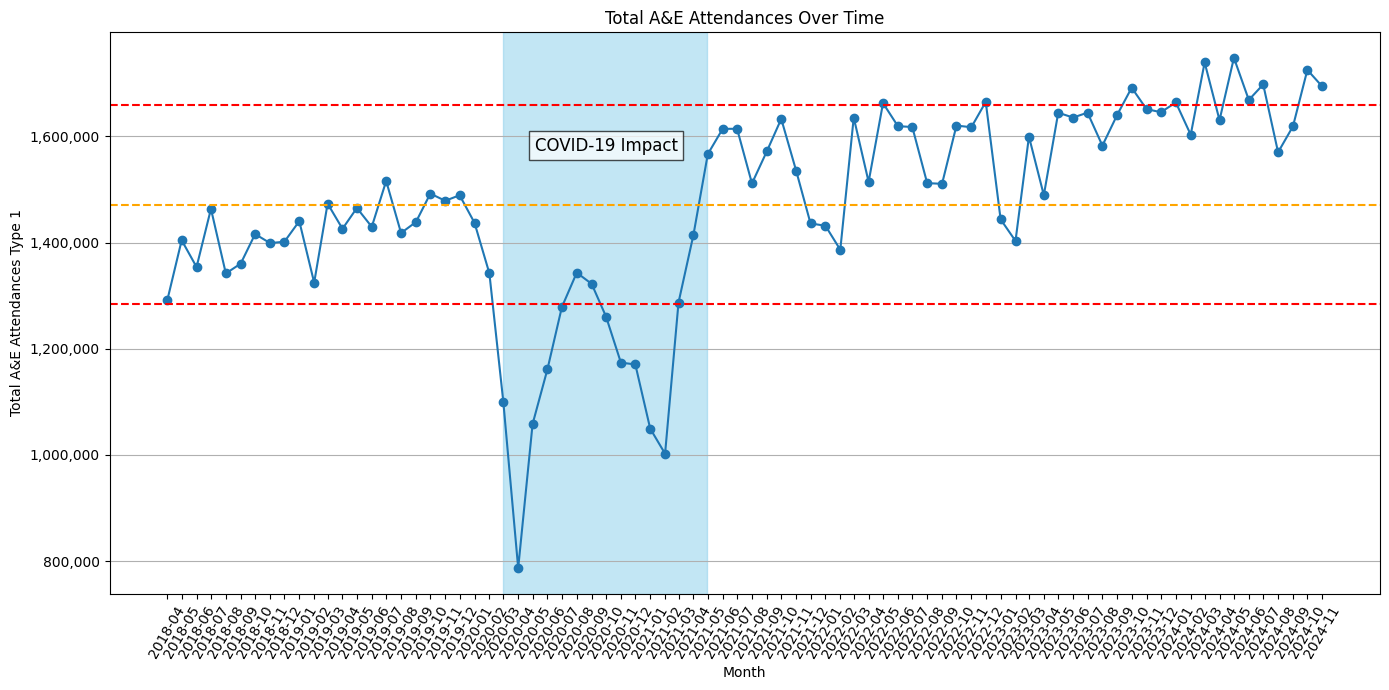

In [839]:
if pd.api.types.is_period_dtype(monthly_attendances_df['Month']):
    monthly_attendances_df['Month'] = monthly_attendances_df['Month'].dt.to_timestamp()

def millions_formatter(x, pos):
    return f'{int(x):,}'

# Calculate mean, upper limit (mean + 1 standard deviation), and lower limit (mean - 1 standard deviation)
mean_value = monthly_attendances_df['Total A&E attendances Type 1'].mean()
std_dev = monthly_attendances_df['Total A&E attendances Type 1'].std()
upper_limit = mean_value + std_dev
lower_limit = mean_value - std_dev

# Plot line chart
plt.figure(figsize=(14, 7))  # Increased width and height for better readability
plt.plot(monthly_attendances_df['Month'], monthly_attendances_df['Total A&E attendances Type 1'], marker='o', linestyle='-')
plt.title('Total A&E Attendances Over Time')
plt.xlabel('Month')
plt.ylabel('Total A&E Attendances Type 1')

# Add mean line
plt.axhline(mean_value, color='orange', linestyle='--', label='Mean')

# Add upper limit line
plt.axhline(upper_limit, color='red', linestyle='--', label='Upper Limit (Mean + 1 SD)')

# Add lower limit line
plt.axhline(lower_limit, color='red', linestyle='--', label='Lower Limit (Mean - 1 SD)')

# Highlighting the COVID-19 period
covid_start = '2020-03-01'  # start date of COVID-19 period
covid_end = '2021-04-30'     # end date of COVID-19 period
plt.axvspan(pd.to_datetime(covid_start), pd.to_datetime(covid_end), color='skyblue', alpha=0.5)

# Adding a label for the shaded area
plt.text(pd.to_datetime('2020-10-01'),
         max(monthly_attendances_df['Total A&E attendances Type 1']) * 0.9,
         'COVID-19 Impact',
         fontsize=12,
         color='black',
         ha='center',
         bbox=dict(facecolor='white', alpha=0.7))

# Apply custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Set x-ticks to show all months
plt.xticks(monthly_attendances_df['Month'], monthly_attendances_df['Month'].dt.strftime('%Y-%m'), rotation=60)

# Show only horizontal grid lines
plt.grid(axis='y')
plt.tight_layout()

plt.show()


There are a few key observations from plotting the time series:

1.   Within the most recent months, the plots are above the upper control limits
2.   There isnt a constant repeated seasonal pattern that I can see by eye, though we can start to see some seasonality in the lowest plots which correlate with December & January, which could prompt a further test.
3.  There are some outliers below the lower control limit which align to the decrease in A&E attendances due to COVID-19 pandemic.



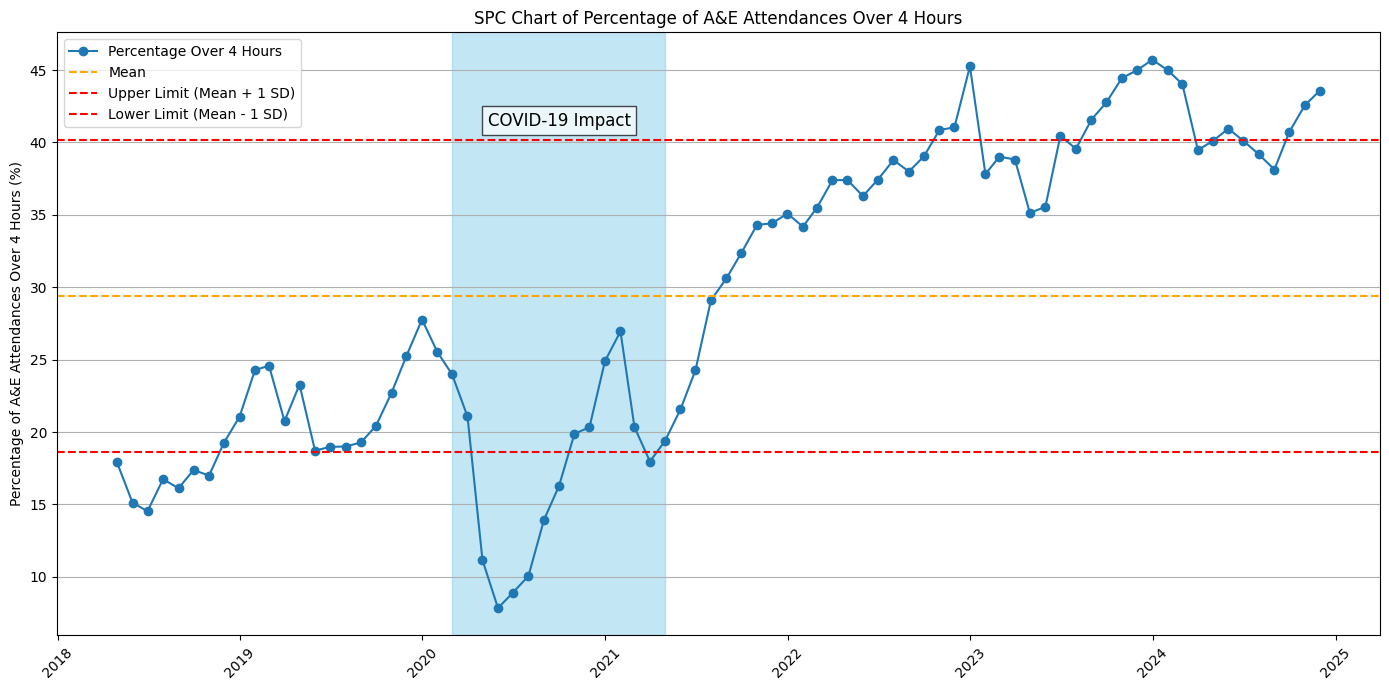

In [840]:
# Step 1: Calculate monthly totals for Attendances over 4 hours and Total A&E attendances
monthly_data = final_df.resample('M', on='Date').agg({
    'Attendances over 4hrs Type 1': 'sum',
    'A&E attendances Type 1': 'sum'
}).reset_index()

# Step 2: Calculate percentage of A&E attendances over 4 hours
monthly_data['Percentage Over 4 Hours'] = (monthly_data['Attendances over 4hrs Type 1'] /
                                            monthly_data['A&E attendances Type 1']) * 100

# Step 3: Calculate mean and control limits
mean_value = monthly_data['Percentage Over 4 Hours'].mean()
std_dev = monthly_data['Percentage Over 4 Hours'].std()
upper_limit = mean_value + std_dev
lower_limit = mean_value - std_dev

# Step 4: Create the SPC chart
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Date'], monthly_data['Percentage Over 4 Hours'], marker='o', linestyle='-', label='Percentage Over 4 Hours')
plt.axhline(mean_value, color='orange', linestyle='--', label='Mean')
plt.axhline(upper_limit, color='red', linestyle='--', label='Upper Limit (Mean + 1 SD)')
plt.axhline(lower_limit, color='red', linestyle='--', label='Lower Limit (Mean - 1 SD)')

# Highlighting the COVID-19 period
covid_start = '2020-03-01'  # start date of COVID-19 period
covid_end = '2021-04-30'     # end date of COVID-19 period
plt.axvspan(pd.to_datetime(covid_start), pd.to_datetime(covid_end), color='skyblue', alpha=0.5)

# Adding a label for the shaded area
plt.text(pd.to_datetime('2020-10-01'),
         max(monthly_data['Percentage Over 4 Hours']) * 0.9,
         'COVID-19 Impact',
         fontsize=12,
         color='black',
         ha='center',
         bbox=dict(facecolor='white', alpha=0.7))

# Formatting y-axis to show percentages
plt.ylabel('Percentage of A&E Attendances Over 4 Hours (%)')
plt.title('SPC Chart of Percentage of A&E Attendances Over 4 Hours')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## SPCs for all metrics to see trends

In [841]:
# List of metrics to plot
metrics = [
    'Attendances over 4hrs Type 1',
    'Emergency admissions via A&E - Other A&E department',
    'Emergency admissions via A&E - Type 1',
    'Other emergency admissions',
    'Patients who have waited 12+ hrs from DTA to admission',
    'Patients who have waited 4-12 hs from DTA to admission'
]

# Create subplots: 4 rows and 2 columns
fig = make_subplots(rows=4, cols=2, subplot_titles=metrics)

# Loop through each metric and create the plots
for i, metric in enumerate(metrics):
    monthly_data = final_df.resample('M', on='Date')[metric].sum().reset_index()

    # Calculate mean, upper limit (mean + 1 standard deviation), and lower limit (mean - 1 standard deviation)
    mean_value = monthly_data[metric].mean()
    std_dev = monthly_data[metric].std()
    upper_limit = mean_value + std_dev
    lower_limit = mean_value - std_dev

    # Determine the row and column for the current metric
    row = i // 2 + 1  # Integer division to determine row number (1-indexed)
    col = i % 2 + 1   # Modulus to determine column number (1-indexed)

    # Add actual values trace
    fig.add_trace(go.Scatter(x=monthly_data['Date'],
                             y=monthly_data[metric],
                             mode='lines+markers',
                             name=f'{metric} Actual',
                             line=dict(color='blue')),
                  row=row, col=col)

    # Add mean line
    fig.add_trace(go.Scatter(x=monthly_data['Date'],
                             y=[mean_value] * len(monthly_data),
                             mode='lines',
                             name='Mean',
                             line=dict(color='orange', dash='dash')),
                  row=row, col=col)

    # Add upper limit line
    fig.add_trace(go.Scatter(x=monthly_data['Date'],
                             y=[upper_limit] * len(monthly_data),
                             mode='lines',
                             name='Upper Limit (Mean + 1 SD)',
                             line=dict(color='red', dash='dash')),
                  row=row, col=col)

    # Add lower limit line
    fig.add_trace(go.Scatter(x=monthly_data['Date'],
                             y=[lower_limit] * len(monthly_data),
                             mode='lines',
                             name='Lower Limit (Mean - 1 SD)',
                             line=dict(color='red', dash='dash')),
                  row=row, col=col)

fig.update_layout(
    title='Metrics Over Time with Mean and Control Limits',
    height=800,
    showlegend=False,
    hoverlabel=dict(
        bgcolor="white",
        bordercolor="black",
        font=dict(size=14),
        namelength=-1
    )
)

fig.update_xaxes(tickangle=60)

fig.show()


## Box plots

- Quickly summarise and compare distributions across groups
- Display key statistics like median, quartiles, and outliers
- Handle large datasets efficiently such as multiple organisations
- Ideal for comparing multiple datasets side-by-side to see differences in key stats.


In [842]:
# List of metrics to plot
metrics = [
    'Attendances over 4hrs Type 1',
    'Emergency admissions via A&E - Other A&E department',
    'Emergency admissions via A&E - Type 1',
    'Other emergency admissions',
    'Patients who have waited 12+ hrs from DTA to admission',
    'Patients who have waited 4-12 hs from DTA to admission'
]

# Calculate the number of rows needed (2 plots per row)
num_rows = math.ceil(len(metrics) / 2)

# Create subplots
fig = make_subplots(rows=num_rows, cols=2, subplot_titles=[f"{metric} - Box Plot" for metric in metrics])

# Create a DataFrame to store statistics
stats_df = pd.DataFrame(columns=['Metric', 'Min', '25%', 'Median', '75%', 'Max', 'Mean'])

# Loop through each metric and create the box plots
for i, metric in enumerate(metrics):
    # Calculate row and column for the current plot
    row = i // 2 + 1
    col = i % 2 + 1

    # Group by Org Code and sum the metric values
    grouped_data = final_df.groupby('Org Code')[metric].sum()

    # Exclude Org Codes with sum of 0
    grouped_data = grouped_data[grouped_data != 0]

    # Get corresponding Org Names
    org_names = final_df[final_df['Org Code'].isin(grouped_data.index)].groupby('Org Code')['Org name'].first()

    # Prepare hover text
    hover_text = [f"Org Code: {code}<br>Org name: {org_names.get(code, 'N/A')}<br>Value: {value}"
                  for code, value in grouped_data.items()]

    # Create and add the box plot
    fig.add_trace(
        go.Box(
            y=grouped_data.values,
            name=metric,
            text=hover_text,
            hoverinfo='text',
            boxpoints="all",  # This line ensures all points are plotted
            jitter=0.3,  # Add some jitter to spread out the points
            pointpos=-1.8  # Adjust point position (negative values place points to the left of the box)
        ),
        row=row, col=col
    )

    # Update y-axis title
    fig.update_yaxes(title_text=metric, row=row, col=col)

    # Calculate statistics
    stats = grouped_data.describe()
    new_row = pd.DataFrame({
        'Metric': [metric],
        'Min': [f"{stats['min']:.2f}"],
        '25%': [f"{stats['25%']:.2f}"],
        'Median': [f"{stats['50%']:.2f}"],
        '75%': [f"{stats['75%']:.2f}"],
        'Max': [f"{stats['max']:.2f}"],
        'Mean': [f"{stats['mean']:.2f}"]
    })
    stats_df = pd.concat([stats_df, new_row], ignore_index=True)

# Update layout
fig.update_layout(
    height=400 * num_rows,  # Height remains the same per row
    width=1200,  # Increased width to accommodate two plots per row
    title_text="Box Plots of Metrics by Org Code (Excluding Zero Sums)",
    showlegend=False
)

# Show the figure
fig.show()


In [843]:
# Function to calculate the 85th percentile
def percentile_85(x):
    return np.percentile(x, 85)

# Calculate statistics including total and 85th percentile
stats_df = pd.DataFrame(columns=['Metric', 'Min', '25%', 'Median', '75%', '85%', 'Max', 'Mean', 'Total'])

for metric in metrics:
    grouped_data = final_df.groupby('Org Code')[metric].sum()
    grouped_data = grouped_data[grouped_data != 0]

    stats = grouped_data.describe()
    percentile_85_value = percentile_85(grouped_data)
    total = grouped_data.sum()

    new_row = pd.DataFrame({
        'Metric': [metric],
        'Min': [f"{stats['min']:.0f}"],
        '25%': [f"{stats['25%']:.0f}"],
        'Median': [f"{stats['50%']:.0f}"],
        '75%': [f"{stats['75%']:.0f}"],
        '85%': [f"{percentile_85_value:.0f}"],
        'Max': [f"{stats['max']:.0f}"],
        'Mean': [f"{stats['mean']:.0f}"],
        'Total': [f"{total:.0f}"]
    })
    stats_df = pd.concat([stats_df, new_row], ignore_index=True)

# Round numeric columns to the nearest integer (already done in the calculation above)

# Create and display the statistics table
table_fig = go.Figure(data=[go.Table(
    header=dict(values=list(stats_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[stats_df[col] for col in stats_df.columns],
               fill_color='lavender',
               align='left')
)])

table_fig.update_layout(
    title_text="Statistics Table for Metrics",
    height=900,
    width=1000  # Increased width to accommodate additional columns
)

table_fig.show()


##Violin plots

- Combine box plot features with kernel density estimation
- Show the full distribution shape, revealing multimodality
- Provide more detailed view of data distribution than box plots


In [844]:
metrics = [
    'A&E attendances Type 1',
    'Attendances over 4hrs Type 1',
    'Emergency admissions via A&E - Other A&E department',
    'Emergency admissions via A&E - Type 1',
    'Emergency admissions via A&E - Type 2',
    'Other emergency admissions',
    'Patients who have waited 12+ hrs from DTA to admission',
    'Patients who have waited 4-12 hs from DTA to admission'
]

fig = go.Figure()

for metric in metrics:
    grouped_data = final_df.groupby('Org Code')[metric].sum()
    grouped_data = grouped_data[grouped_data != 0]

    fig.add_trace(go.Violin(y=grouped_data.values, name=metric, box_visible=True, meanline_visible=True))

fig.update_layout(title_text="Violin Plots of Metrics", height=600, width=1000)
fig.show()


## Correlogram

- Visualise correlations between multiple variables in the same grid
- Use colour and shape to represent correlation strength and direction
- Identify patterns and relationships across many variables at once

**Positive Correlation:**
Values close to +1 indicate a strong positive relationship, meaning that as one variable increases, the other tends to increase as well.

**Negative Correlation:**
Values close to -1 indicate a strong negative relationship, meaning that as one variable increases, the other tends to decrease.

**No Correlation:**
Values around 0 suggest little to no linear relationship between the variables.

**Strength of Relationships:**

*   Very High (0.90 to 1.00): Strong positive correlation.
*   High (0.70 to 0.90): Moderate positive correlation.
*   Moderate (0.50 to 0.70): Moderate relationship.
*   Low (0.30 to 0.50): Weak positive correlation.
*   Negligible (0.00 to 0.30): Very weak or no correlation.



In [845]:
#Correlation Coefficients: Each cell in the matrix shows the correlation coefficient between two variables, ranging from -1 to +1.

# Define the metrics and exclude 'Emergency admissions via A&E - Type 2'
metrics = [
    'A&E attendances Type 1',
    'Attendances over 4hrs Type 1',
    'Emergency admissions via A&E - Other A&E department',
    'Emergency admissions via A&E - Type 1',
    'Other emergency admissions',
    'Patients who have waited 12+ hrs from DTA to admission',
    'Patients who have waited 4-12 hs from DTA to admission'
]

# Calculate the correlation matrix
correlation_matrix = final_df[metrics].corr()

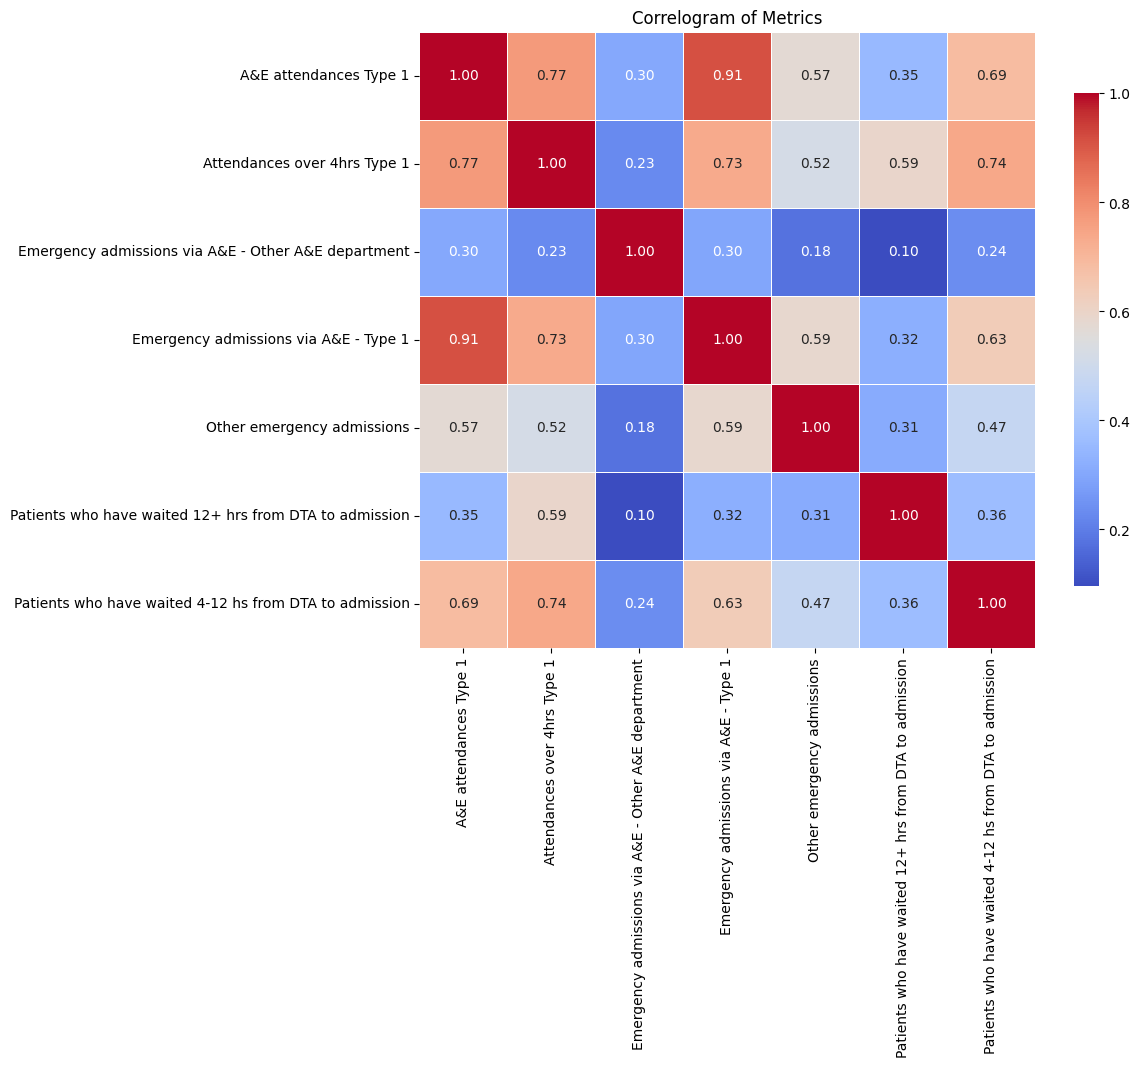

In [846]:
# Calculate the correlation matrix
correlation_matrix = final_df[metrics].corr()

# Create a correlogram
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Correlogram of Metrics')
plt.show()


In [847]:
# Example scatter plot between two metrics
fig = px.scatter(final_df, x='A&E attendances Type 1', y='Attendances over 4hrs Type 1',
                 title='Scatter Plot of A&E Attendances vs. Attendances Over 4hrs',
                 labels={'A&E attendances Type 1': 'A&E Attendances Type 1',
                         'Attendances over 4hrs Type 1': 'Attendances Over 4hrs'},
                 trendline='ols')

fig.show()


##Bubble chart

- Display relationships between three variables on a single plot
- Use position for two variables and bubble size for the third
- Effective for showing clusters or trends in multidimensional data

In [848]:
# Calculate the percentage of patients waiting over 12 hours
final_df['Percent waited over 12 hours'] = (final_df['Patients who have waited 12+ hrs from DTA to admission'] / final_df['A&E attendances Type 1']) * 100

final_df['Percent waited over 12 hours'] = final_df['Percent waited over 12 hours'].fillna(0)

# Calculate the percentage of admissions
final_df['Percent admissions'] = final_df['Emergency admissions via A&E - Type 1'] / final_df['A&E attendances Type 1']

# Create the bubble chart
fig = px.scatter(final_df, x='A&E attendances Type 1',
                 y='Percent admissions',
                 size='Percent waited over 12 hours',
                 title='Bubble Chart of A&E Attendances, Admissions, and Wait Times',
                 labels={'A&E attendances Type 1': 'A&E Attendances Type 1',
                         'Percent admissions': '% Emergency Admissions via A&E Type 1',
                         'Percent waited over 12 hours': '% Waited Over 12 Hours'},
                 hover_name='Org name',
                 hover_data={'Percent waited over 12 hours': ':.2f', 'Percent admissions': ':.2%'})

# Customize the layout
fig.update_layout(
    xaxis_title="A&E Attendances Type 1",
    yaxis_title="% Emergency Admissions via A&E Type 1",
    yaxis_tickformat='.1%',  # Format y-axis as percentage
)

fig.show()


##Area stacked charts


- Show how different components contribute to a total over time
- Visualise part-to-whole relationships and their evolution
- Useful for comparing proportions and identifying trends in composition



In [849]:
# Calculate 'A&E attendances under 4hrs Type 1'
final_df['A&E attendances under 4hrs Type 1'] = final_df['A&E attendances Type 1'] - final_df['Attendances over 4hrs Type 1']

# Define the metrics for each chart
chart1_metrics = ['A&E attendances under 4hrs Type 1', 'Attendances over 4hrs Type 1']
chart2_metrics = ['Emergency admissions via A&E - Other A&E department',
                  'Emergency admissions via A&E - Type 1',
                  'Emergency admissions via A&E - Type 2',
                  'Other emergency admissions']
chart3_metrics = ['Patients who have waited 12+ hrs from DTA to admission',
                  'Patients who have waited 4-12 hs from DTA to admission']

# Define colors for each metric
colors = {
    'A&E attendances under 4hrs Type 1': 'rgba(255, 99, 132, 0.6)',  # Red
    'Attendances over 4hrs Type 1': 'rgba(54, 162, 235, 0.6)',      # Blue
    'Emergency admissions via A&E - Other A&E department': 'rgba(75, 192, 192, 0.6)', # Teal
    'Emergency admissions via A&E - Type 1': 'rgba(255, 206, 86, 0.6)',              # Yellow
    'Emergency admissions via A&E - Type 2': 'rgba(153, 102, 255, 0.6)',            # Purple
    'Other emergency admissions': 'rgba(255, 159, 64, 0.6)',                          # Orange
    'Patients who have waited 12+ hrs from DTA to admission': 'rgba(201, 203, 207, 0.6)', # Gray
    'Patients who have waited 4-12 hs from DTA to admission': 'rgba(255, 99, 132, 0.6)'   # Red
}

# Create subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=("A&E Attendances", "Emergency Admissions", "Patient Wait Times"))

# Function to add traces to a subplot with specified colors
def add_traces(metrics, col):
    for metric in metrics:
        monthly_data = final_df.groupby('Date')[metric].sum().resample('M').sum()
        fig.add_trace(go.Scatter(
            x=monthly_data.index,
            y=monthly_data.values,
            name=metric,
            stackgroup='one',
            hovertemplate=f"{metric}: %{{y}}<br>Date: %{{x|%Y-%m-%d}}<extra></extra>",
            fill='tozeroy',   # Fill area under the line
            fillcolor=colors[metric]   # Set fill color from the defined colors dictionary
        ), row=1, col=col)

# Add traces for each chart
add_traces(chart1_metrics, 1)
add_traces(chart2_metrics, 2)
add_traces(chart3_metrics, 3)

# Update layout
fig.update_layout(height=600, width=1800, title_text="Stacked Area Charts of A&E Metrics Over Time")
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_xaxes(title_text="Date", row=1, col=3)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=3)

# Remove the legend
fig.update_layout(showlegend=False)

fig.show()


#Perform Time Series Analysis & Prediction Model
The time series model will aim to predict how many type 1 A&E attendances each hospital will have based on historical data. The attendances will be filtered to type 1, which is a consultant led 24-hour service with full resuscitation facilities and designated accommodation for the reception of accident and emergency patients (NHS England, n.d.)

##**Deciding on ARIMA Usage**

To determine p and q the correlogram can be examined and partial correlogram of the stationary series to select appropriate p and q values (Abugaber, n.d.).

To select the model, I will use information criteria like AIC or BIC to compare different ARIMA models and select the best fit (Rob J Hyndman, 2014).

While ARIMA is suitable for my stationary data, I will consider other models as well for comparison. The KPSS test, which has a null hypothesis of stationarity, can provide additional confirmation (Rob J Hyndman, 2014).

In conclusion, the ADF test is a guide, but model performance on out-of-sample data will ultimately determine my choice.

##Check for stationarity

Keeping things stationary makes the modeling task a lot easier, helps to improve our model accuracy and in return provides us with more reliable predictions. While ARIMA models can deal with non-stationarity up to a point, they cannot effectively account for time-varying variance (Zaina Saadeddin, 2024)

The code below implements the Augmented Dickey-Fuller (ADF) test, which is a statistical test used to determine whether a time series is stationary or non-stationary. The ADF test checks for the presence of a unit root in the data, which indicates non-stationarity (Fuller, 1976).

In [850]:
def check_stationarity(series):
    results = adfuller(series)[1:3]
    s = 'Non-Stationary'
    if results[0] < 0.05:
        s = 'Stationary'
    print(f"{s}\t p-value:{results[0]} \t lags:{results[1]}")
    return (s, results[0])

check_stationarity(monthly_attendances_df['Total A&E attendances Type 1'])


Non-Stationary	 p-value:0.0913419340712176 	 lags:0


('Non-Stationary', 0.0913419340712176)

A stationary time series is one whose statistical properties, such as mean, variance, and autocorrelation, remain constant over time (Statistics How To, n.d.).

Based on the ADF (Augmented Dickey-Fuller) test results, we can conclude that this time series is non-stationary.

##Split the data into train / test datasets
Splitting time series data for an ARIMA model into training, validation, and test sets is a common practice in machine learning approaches to time series forecasting.

The 60-20-20 split chosen allows for a substantial portion of data (60%) to train the model, while reserving equal parts (20% each) for validation and testing.

This approach enables model tuning on the validation set and final performance evaluation on the unseen test set, helping to assess the model's generalisation ability (Hyndman and Athanasopoulos, 2018).

For time series data, it's crucial to maintain the temporal order when splitting. Unlike random sampling used in cross-sectional data, time series splits should be sequential to preserve the time-dependent structure of the data (Brownlee, 2021). The validation set allows for hyperparameter tuning and model selection without compromising the integrity of the test set, which serves as a final check on the model's predictive performance.

In [851]:
# Extract just the year and month from the Date column
monthly_attendances_df['YearMonth'] = monthly_attendances_df['Month'].dt.to_period('M')

# Count distinct months
distinct_months = monthly_attendances_df['YearMonth'].nunique()
print(f"Number of distinct months in the dataset: {distinct_months}")

# Calculate the split points (60% and 80% of the months)
train_split_point = int(distinct_months * 0.6)
val_split_point = int(distinct_months * 0.8)

# Get the unique YearMonth values sorted
sorted_year_months = monthly_attendances_df['YearMonth'].sort_values().unique()

# Create train, validation, and test sets based on split points
train_df = monthly_attendances_df[monthly_attendances_df['YearMonth'].isin(sorted_year_months[:train_split_point])]
val_df = monthly_attendances_df[monthly_attendances_df['YearMonth'].isin(sorted_year_months[train_split_point:val_split_point])]
test_df = monthly_attendances_df[monthly_attendances_df['YearMonth'].isin(sorted_year_months[val_split_point:])]

# Print the date ranges for train, validation, and test sets
print(f"Train set date range: {train_df['Month'].min()} to {train_df['Month'].max()}")
print(f"Validation set date range: {val_df['Month'].min()} to {val_df['Month'].max()}")
print(f"Test set date range: {test_df['Month'].min()} to {test_df['Month'].max()}")

# Print the number of rows in each set
print(f"Number of rows in train set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

# Remove the temporary YearMonth column
reduced_df = monthly_attendances_df.drop('YearMonth', axis=1)

Number of distinct months in the dataset: 80
Train set date range: 2018-04-01 00:00:00 to 2022-03-01 00:00:00
Validation set date range: 2022-04-01 00:00:00 to 2023-07-01 00:00:00
Test set date range: 2023-08-01 00:00:00 to 2024-11-01 00:00:00
Number of rows in train set: 48
Number of rows in validation set: 16
Number of rows in test set: 16


In [852]:
# Define the training, validation, and test date ranges
train_start = train_df['Month'].min()
train_end = train_df['Month'].max()
val_start = val_df['Month'].min()
val_end = val_df['Month'].max()
test_start = test_df['Month'].min()
test_end = test_df['Month'].max()

In [853]:
#View the data
train_df

Month  Total A&E attendances Type 1 YearMonth
0  2018-04-01                     1291234.0   2018-04
1  2018-05-01                     1404359.0   2018-05
2  2018-06-01                     1353939.0   2018-06
3  2018-07-01                     1463553.0   2018-07
4  2018-08-01                     1341774.0   2018-08
5  2018-09-01                     1360399.0   2018-09
6  2018-10-01                     1416034.0   2018-10
7  2018-11-01                     1399064.0   2018-11
8  2018-12-01                     1401604.0   2018-12
9  2019-01-01                     1440351.0   2019-01
10 2019-02-01                     1324502.0   2019-02
11 2019-03-01                     1473412.0   2019-03
12 2019-04-01                     1425990.0   2019-04
13 2019-05-01                     1465211.0   2019-05
14 2019-06-01                     1429642.0   2019-06
15 2019-07-01                     1516048.0   2019-07
16 2019-08-01                     1418053.0   2019-08
17 2019-09-01                     1438702.0   2019-09
18 2019-10-01                     1492335.0   2019-10
19 2019-11-01                     1478711.0   2019-11
20 2019-12-01                     1489205.0   2019-12
21 2020-01-01                     1437323.0   2020-01
22 2020-02-01                     1342031.0   2020-02
23 2020-03-01                     1100226.0   2020-03
24 2020-04-01                      786651.0   2020-04
25 2020-05-01                     1058061.0   2020-05
26 2020-06-01                     1161478.0   2020-06
27 2020-07-01                     1278407.0   2020-07
28 2020-08-01                     1343279.0   2020-08
29 2020-09-01                     1322236.0   2020-09
30 2020-10-01                     1260599.0   2020-10
31 2020-11-01                     1173695.0   2020-11
32 2020-12-01                     1170453.0   2020-12
33 2021-01-01                     1049498.0   2021-01
34 2021-02-01                     1002167.0   2021-02
35 2021-03-01                     1287066.0   2021-03
36 2021-04-01                     1414100.0   2021-04
37 2021-05-01                     1566700.0   2021-05
38 2021-06-01                     1614321.0   2021-06
39 2021-07-01                     1614386.0   2021-07
40 2021-08-01                     1511468.0   2021-08
41 2021-09-01                     1571964.0   2021-09
42 2021-10-01                     1633045.0   2021-10
43 2021-11-01                     1535578.0   2021-11
44 2021-12-01                     1436055.0   2021-12
45 2022-01-01                     1431695.0   2022-01
46 2022-02-01                     1386467.0   2022-02
47 2022-03-01                     1635554.0   2022-03

## Check for seasonality
Through reviewing the data in EDA, I noted there may be some seasonality which prompted me to explore a SARIMA model. I've therefore started to do some tests on the data to assess seasonality.

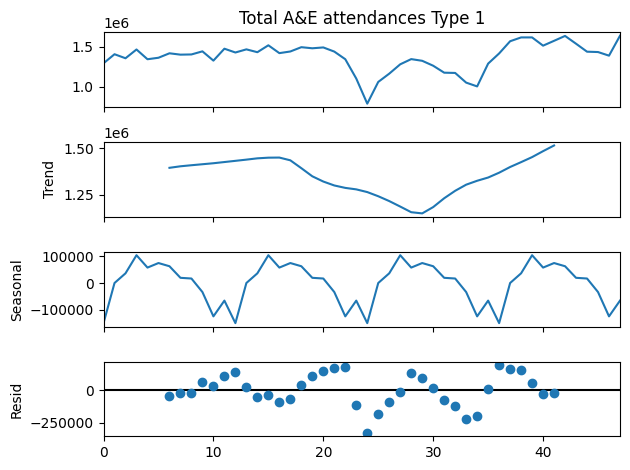

In [854]:
# Seasonal Decomposition
decomposition = seasonal_decompose(train_df["Total A&E attendances Type 1"], model='additive', period=12)
fig = decomposition.plot()
plt.tight_layout()
plt.show()

On review of the plots below:

1. Note there appears to be outliers, which we could calculate Z scores & exclude from model.

2. The Trend further shows this decrease - assume during COVID-19 and an upward trend since this point.

3. From investigating examples of seasonal decomposition charts, I believe we can see some seasonality due to the repeated pattern. (Yoss, 2020)

4. The Residuals shows some randomness which will benefit from a moving average.


#Tuning an ARIMA model

There are three parts to the tuning of an ARIMA model, 4 to a SARIMAX. The parameters are (p,d,q). The first stage with an ARIMA or SARIMAX model is to find the hyperparameter tunings, the p for AR, which is the auto-regressive part of the 'AR'IMA model.

This value can be found from the PACF graph, which you run on the differenced univariate series of data.

The d is the differencing order.

The q is the MA part, the moving average which you obtain from the ACF graph.

Below we will plot the ACF and PACF graphs to obtain these numbers.

In [855]:
# Calculate the difference of the 'Total A&E attendances Type 1' column
attendances_diff = monthly_attendances_df['Total A&E attendances Type 1'].diff().dropna()

# Check stationarity of the differenced dataset
print("Checking stationarity of the differenced Total A&E attendances Type 1:")
check_stationarity(attendances_diff)

Checking stationarity of the differenced Total A&E attendances Type 1:
Non-Stationary	 p-value:0.10807092655635764 	 lags:12


('Non-Stationary', 0.10807092655635764)

As the data remains non-stationary, I will need to account for this in 'd' of my ARIMA parameters.

In [856]:
# Box-Cox Transformation (to stabilise variance)
data_boxcox, lambda_param = boxcox(train_df["Total A&E attendances Type 1"])

The Box-Cox transformation is a statistical technique used to stabilise variance and make data more normally distributed. It was recommended when working with non-normal data in statistical analyses that assume normality, such as linear regression and time series analysis.

The Box-Cox transformation can be used on data that is not normally distributed. This includes data that is skewed or has outliers. The transformation can improve the accuracy of predictions made using linear regression. (Anon, n.d.)

In [857]:
# Check your data
print(train_df["Total A&E attendances Type 1"].head())
print(train_df["Total A&E attendances Type 1"].dtype)

# Run the Ljung-Box test with error handling
try:
    result = acorr_ljungbox(train_df["Total A&E attendances Type 1"], lags=[12, 24, 36])
    print("Test successful. Result:", result)
except Exception as e:
    print("An error occurred:", str(e))

# If the above fails, try with numpy array
try:
    data_array = train_df["Total A&E attendances Type 1"].values
    result = acorr_ljungbox(data_array, lags=[12, 24, 36])
    print("Test successful with numpy array. Result:", result)
except Exception as e:
    print("An error occurred with numpy array:", str(e))


0    1291234.0
1    1404359.0
2    1353939.0
3    1463553.0
4    1341774.0
Name: Total A&E attendances Type 1, dtype: float64
float64
Test successful. Result:        lb_stat     lb_pvalue
12   56.138092  1.130388e-07
24  121.146508  6.060194e-15
36  127.591577  3.594521e-12
Test successful with numpy array. Result:        lb_stat     lb_pvalue
12   56.138092  1.130388e-07
24  121.146508  6.060194e-15
36  127.591577  3.594521e-12


The Ljung-Box test revealed significant autocorrelation at lags 12, 24, and 36 (p < 0.001 for all), strongly suggesting the presence of seasonal patterns in the data. This supports the use of a seasonal model such as SARIMA for forecasting. (Minitlab.com, 2024)

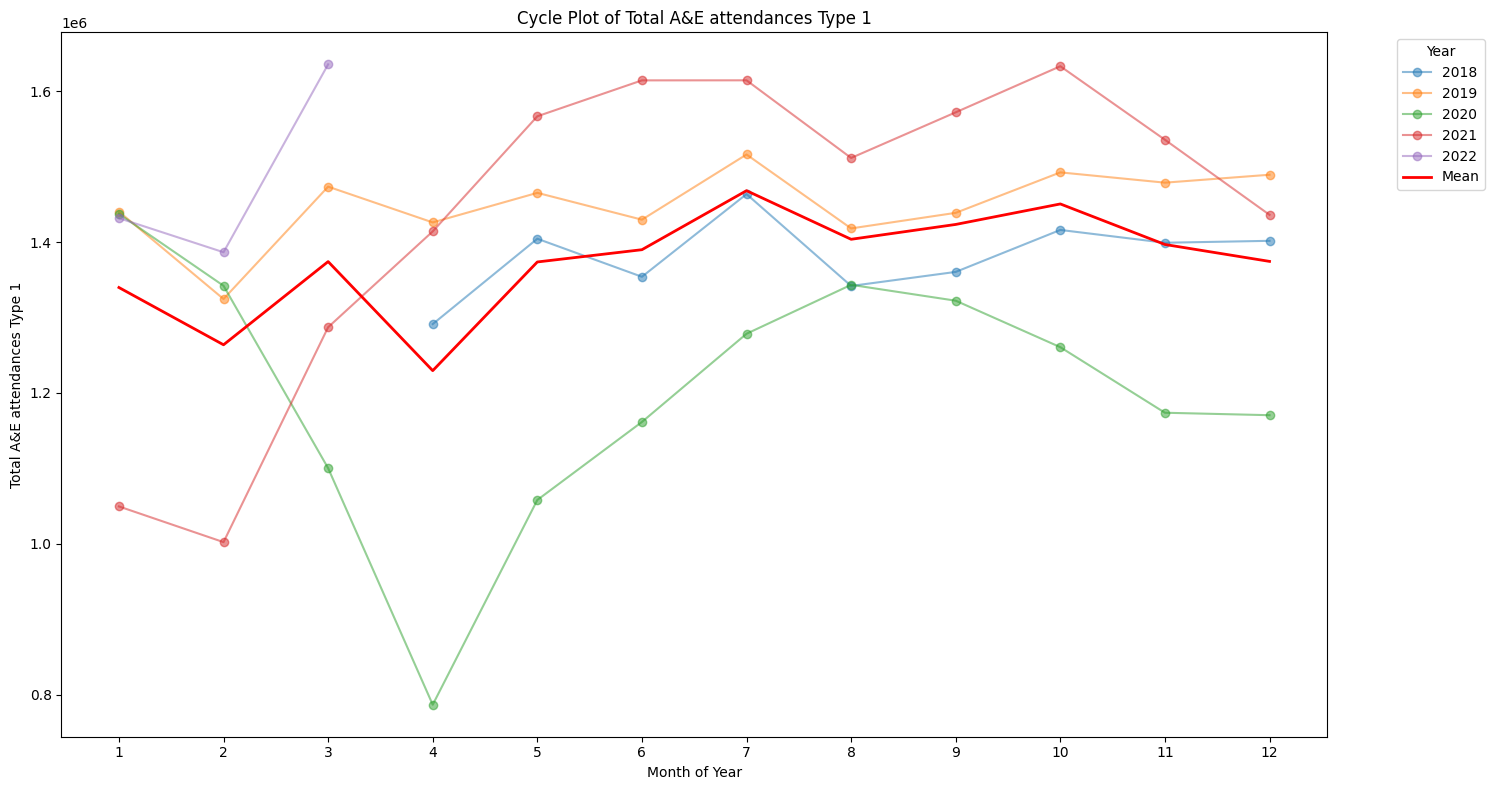

In [858]:
def cycle_plot(df, value_column, date_column, period=12):
    # Ensure the date column is datetime
    df[date_column] = pd.to_datetime(df[date_column])

    # Create a DataFrame with cycle and year columns
    df_plot = pd.DataFrame({
        'value': df[value_column],
        'cycle': df[date_column].dt.month,
        'year': df[date_column].dt.year
    })

    # Calculate the mean for each cycle across all years
    cycle_means = df_plot.groupby('cycle')['value'].mean()

    # Set up the plot
    fig, ax = plt.subplots(figsize=(15, 8))

    # Plot individual year lines
    for year in df_plot['year'].unique():
        year_data = df_plot[df_plot['year'] == year]
        ax.plot(year_data['cycle'], year_data['value'], marker='o', linestyle='-', alpha=0.5, label=year)

    # Plot the mean line
    ax.plot(cycle_means.index, cycle_means.values, color='red', linewidth=2, label='Mean')

    # Customise the plot
    ax.set_xticks(range(1, period + 1))
    ax.set_xlabel('Month of Year')
    ax.set_ylabel(value_column)
    ax.set_title(f'Cycle Plot of {value_column}')
    ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Use the function with the train_df
cycle_plot(train_df, "Total A&E attendances Type 1", "Month")


The cycle plots continue to show some evidence of seasonality, with some outliers.

##Calculate Z scores to identify outliers

Within the seasonality check, there were clear evidence of outliers, so I calculate a Z score to find outliers. I was removing April 2020 based on this, but I worried about the impact it would have on my models as it expected 12M seasonality.

For now, I've decided to keep the outliers, and will explore removing them during my modelling.

In [859]:
# Calculate the Z-scores
train_df['Z-Score'] = (train_df['Total A&E attendances Type 1'] - train_df['Total A&E attendances Type 1'].mean()) / train_df['Total A&E attendances Type 1'].std()

# Identify outliers based on Z-score threshold
z_threshold = 3
outliers_z = train_df[(train_df['Z-Score'] > z_threshold) | (train_df['Z-Score'] < -z_threshold)]

# Exclude outliers from the DataFrame
#train_df = train_df[(train_df['Z-Score'] <= z_threshold) & (train_df['Z-Score'] >= -z_threshold)]

# Display outliers and cleaned DataFrame
print("Outliers based on Z-scores:")
print(outliers_z)
print("\nCleaned DataFrame:")
print(train_df)


Outliers based on Z-scores:
        Month  Total A&E attendances Type 1 YearMonth   Z-Score
24 2020-04-01                      786651.0   2020-04 -3.372127

Cleaned DataFrame:
        Month  Total A&E attendances Type 1 YearMonth   Z-Score
0  2018-04-01                     1291234.0   2018-04 -0.474835
1  2018-05-01                     1404359.0   2018-05  0.174724
2  2018-06-01                     1353939.0   2018-06 -0.114786
3  2018-07-01                     1463553.0   2018-07  0.514613
4  2018-08-01                     1341774.0   2018-08 -0.184636
5  2018-09-01                     1360399.0   2018-09 -0.077693
6  2018-10-01                     1416034.0   2018-10  0.241761
7  2018-11-01                     1399064.0   2018-11  0.144320
8  2018-12-01                     1401604.0   2018-12  0.158905
9  2019-01-01                     1440351.0   2019-01  0.381388
10 2019-02-01                     1324502.0   2019-02 -0.283811
11 2019-03-01                     1473412.0   2019-03  0

##Finding the ARIMA terms

The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) are essential tools in time series analysis, particularly for identifying appropriate ARIMA model parameters.

ACF measures the correlation between a time series and its lagged values, while PACF measures the correlation between a time series and its lagged values after controlling for the effects of intermediate lags (Box et al., 2015).

These functions are crucial for ARIMA modeling because they help determine the orders of the autoregressive (**AR**) and moving average (**MA**) components.

The ACF plot assists in identifying the MA order (**q**) by showing where significant correlations cut off, while the PACF plot helps determine the AR order (**p**) by indicating where partial correlations become insignificant (Nau, 2004).

By analysing these plots, we can make informed decisions about model specification, leading to more accurate forecasts and a better understanding of the underlying time series structure (Hyndman and Athanasopoulos, 2018).

In [860]:
#My train data has 48 observations (the shape is (48,)).

print(train_df["Total A&E attendances Type 1"].shape)
print(train_df["Total A&E attendances Type 1"].head())


(48,)
0    1291234.0
1    1404359.0
2    1353939.0
3    1463553.0
4    1341774.0
Name: Total A&E attendances Type 1, dtype: float64


I made an adjustment to the code below to adjust the number of lags to be less than or equal to the number of observations minus one. To avoid hardcoding, in the code below I use the maximum number of lags possible in my train data, which is 47 (48 observations minus 1).

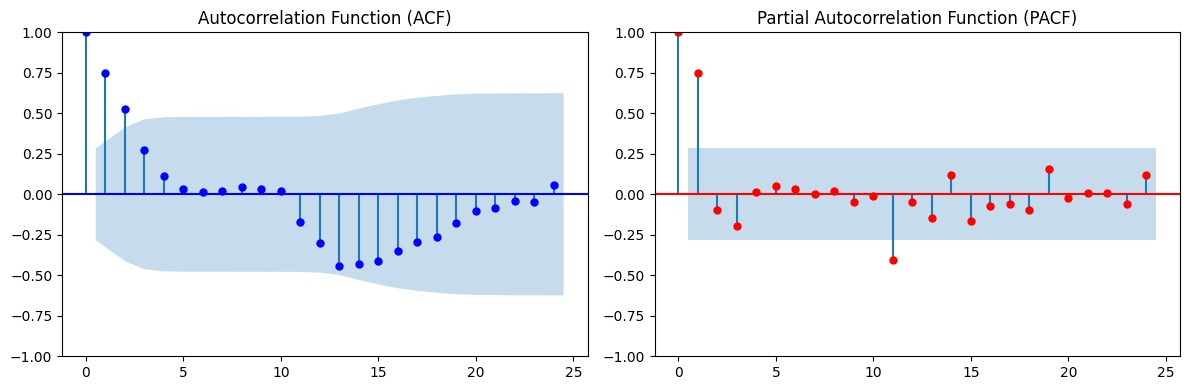

In [861]:
# Calculate the maximum number of lags (50% of sample size)
max_lags = len(train_df["Total A&E attendances Type 1"]) // 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(train_df["Total A&E attendances Type 1"], lags=max_lags, ax=ax1, color='blue')
ax1.set_title('Autocorrelation Function (ACF)')

plot_pacf(train_df["Total A&E attendances Type 1"], lags=max_lags, ax=ax2, color='red')
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


The blue shaded area in ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots represents the confidence interval, typically at a 95% confidence level (Hyndman and Athanasopoulos, 2018).

This area serves several important purposes in time series analysis:

**Statistical significance:** Autocorrelation values falling outside these bands are considered statistically significant (Box et al., 2015). In the generated ACF and PACF plots, significant spikes are observed. Specifically, in the ACF plot, the first three lags show values of 1, 0.75, and just above 0.5, with the second and third lags extending outside the blue shaded area, indicating significant autocorrelations at those lags. In contrast, all other plots remain within the confidence intervals.

**White noise indicator:** If no spikes extend beyond the blue shaded area, it suggests that the series may be white noise (Nau, 2004). However, examining the ACF plot reveals that while some spikes are significant, there are also 11 plots below zero out of a total of 25. This indicates that the time series does not exhibit characteristics of pure white noise.

**Model identification:** Significant spikes outside this area help in identifying appropriate ARIMA model parameters (Hyndman and Athanasopoulos, 2018). The ACF plot shows significant spikes at the first two lags, which suggests that both AR (p) and MA (q) components may be necessary for modeling. The PACF plot also shows a significant spike at lag 1 (value of 1), with the second lag at 0.75 extending outside the confidence intervals. This pattern indicates that we can consider using ARIMA(1, d, 1).

**Stationarity assessment:** The pattern of spikes in relation to this area can indicate whether a time series is stationary or non-stationary (Nau, 2004). In both generated plots, while some autocorrelations decay quickly to within the confidence bands, the presence of significant spikes suggests that further differencing may be required to achieve stationarity.

**Threshold for interpretation:** The confidence bands provide a visual threshold for interpreting which lags have meaningful correlations (Box et al., 2015). This helps distinguish between significant and non-significant autocorrelations in the time series.

For a typical 95% confidence interval, the bounds are often approximated as ±2/√N, where N is the number of observations (Hyndman and Athanasopoulos, 2018), but more accurate calculations may be used in some Python libraries.

The number of lags where ACF cuts off indicates q, and where PACF cuts off indicates p. We also need to choose an appropriate value for d by ensuring that after differencing, the data resembles white noise.


In tuning the ARIMA model for the best fit with the dataset, there are metrics to measure the best fit model. AIC is one, 'Akaike Information Criterion'. https://www.sciencedirect.com/topics/pharmacology-toxicology-and-pharmaceutical-science/akaike-information-criterion

This is a metric that looks at the sample variance and produces a lower score the lower the model variance. Ideally you're looking for a model that produces a low AIC, for variance, and a low BIC (Bayesian Information Criterion), which indicates a lower penalty for the model.

(5, 3)


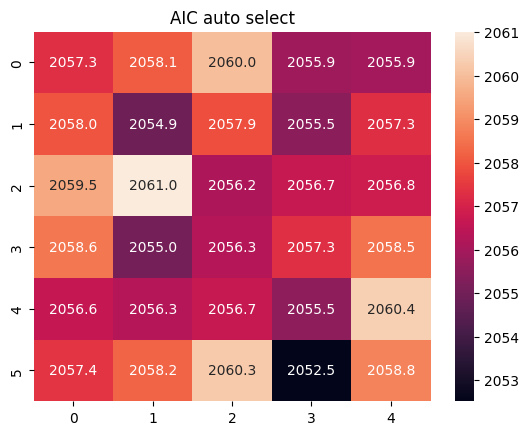

In [862]:
# Auto-select function to identify the p, and q for ARIMA.

auto_select = sm.tsa.stattools.arma_order_select_ic(attendances_diff, max_ar=5, max_ma=4, ic='aic', trend='n', model_kw={}, fit_kw={})

print(auto_select.aic_min_order)

sns.heatmap(auto_select['aic'], annot=True, fmt='.1f')
plt.ylim([auto_select['aic'].shape[0], 0])
plt.title('AIC auto select')
plt.show()

This heatmap visualises the Akaike Information Criterion (AIC) values for different combinations of ARIMA model orders.

**Axes:**

The x-axis represents the Moving Average (MA) order (q)
The y-axis represents the Autoregressive (AR) order (p)

**Colour intensity:**

Darker colors indicate lower AIC values.
Lighter colors indicate higher AIC values.

**Numbers in cells:**

Each cell contains the AIC value for that specific combination of p and q
Lower values are better, as AIC aims to minimise the information loss.

**Optimal model:**

The cell with the lowest AIC value represents the best model according to this criterion.

From this matrix (5,3) is the optimal p and q, which correspond to the cell with the lowest value.

p = 5 (autoregressive order)
q = 3 (moving average order)
d = the order of differencing, which is not determined by the AIC selection & needs to be tested as previously stated.


The ARIMA model will be represented as: ARIMA(5,d,3)

## Fit the ARIMA and SARIMA Models on train_df



In [863]:
# Function to fit ARIMA model and return AIC
def fit_arima(data, order):
    model = ARIMA(data, order=order)
    results = model.fit()
    return results.aic, results

# Test different differencing orders
differencing_orders = [0, 1, 2]
aic_values = []
models = []

for d in differencing_orders:
    try:
        aic, model = fit_arima(train_df["Total A&E attendances Type 1"], order=(5, d, 3))
        aic_values.append(aic)
        models.append(model)
    except:
        print(f"Failed to fit ARIMA model with d={d}")

if not aic_values:
    raise ValueError("No ARIMA models could be fit. Check your data.")

# Find the best differencing order
best_d = differencing_orders[aic_values.index(min(aic_values))]
best_model = models[aic_values.index(min(aic_values))]

print(f"Best differencing order (d): {best_d}")
print(f"AIC values for d=0, d=1, d=2: {aic_values}")

print("\nBest ARIMA Model Summary:")
print(best_model.summary())



Best differencing order (d): 2
AIC values for d=0, d=1, d=2: [1263.5627136281446, 1242.615970063151, 1231.6485984196968]

Best ARIMA Model Summary:
                                    SARIMAX Results                                     
Dep. Variable:     Total A&E attendances Type 1   No. Observations:                   48
Model:                           ARIMA(5, 2, 3)   Log Likelihood                -606.824
Date:                          Wed, 08 Jan 2025   AIC                           1231.649
Time:                                  16:28:21   BIC                           1248.106
Sample:                                       0   HQIC                          1237.814
                                           - 48                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

##ACF of Residuals

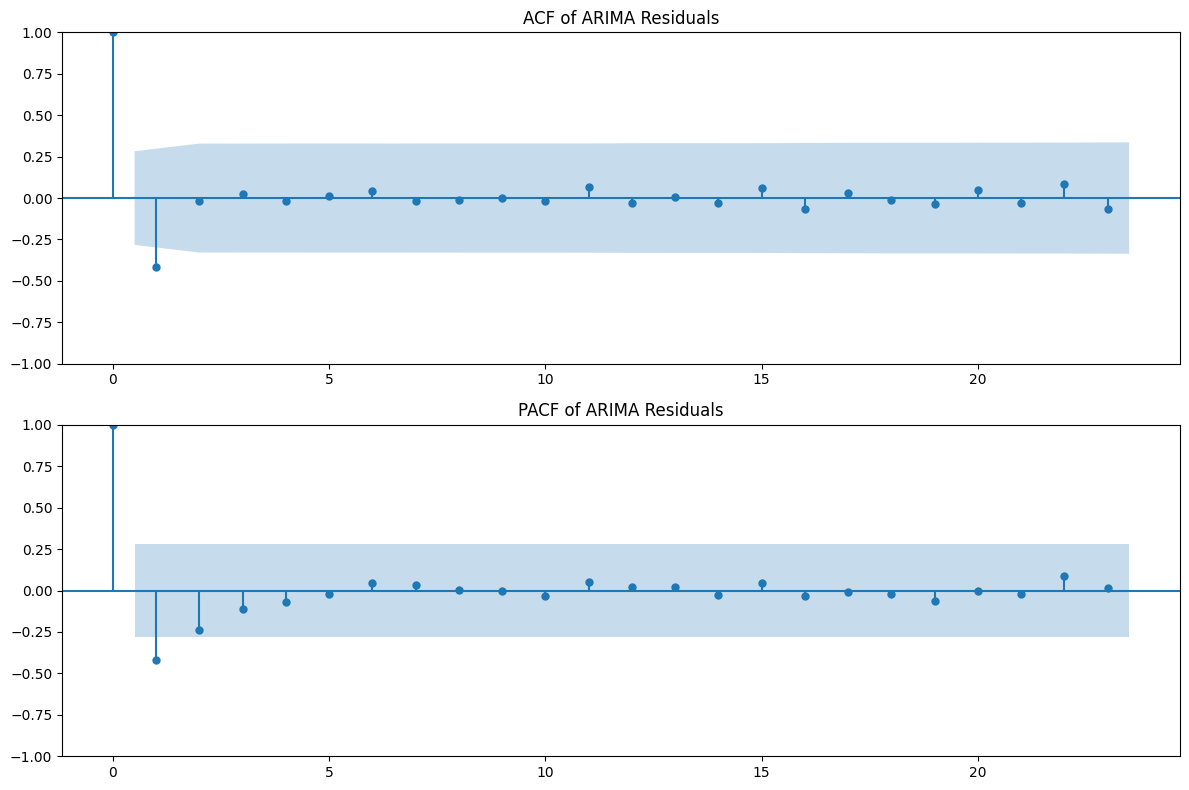

In [864]:
# Extract residuals from the best ARIMA model
residuals = best_model.resid

# Create a figure for ACF and PACF plots
plt.figure(figsize=(12, 8))

# Plot ACF of ARIMA Residuals
plt.subplot(211)
sm.graphics.tsa.plot_acf(residuals, ax=plt.gca(), lags=min(40, len(residuals)//2 - 1))
plt.title('ACF of ARIMA Residuals')

# Plot PACF of ARIMA Residuals
plt.subplot(212)
sm.graphics.tsa.plot_pacf(residuals, ax=plt.gca(), lags=min(40, len(residuals)//2 - 1))
plt.title('PACF of ARIMA Residuals')

# Adjust layout and display plots
plt.tight_layout()
plt.show()


##Check if a SARIMA model is a better option

Because I noted some seasonality, I tested if a SARIMA model performed better than ARIMA. But based on comparison of the AIC values in both models, the ARIMA seemed to perform better.

In [865]:

# Seasonality check
seasonal_test = sm.tsa.stattools.adfuller(train_df["Total A&E attendances Type 1"])
seasonality_present = seasonal_test[1] < 0.05  # Check p-value for stationarity

if seasonality_present:
    print("\nSeasonality detected. Consider using SARIMA model.")
    try:
        sarima_model = pm.auto_arima(
            train_df["Total A&E attendances Type 1"],
            seasonal=True,
            m=12,
            start_p=1, start_q=1, d=best_d,
            max_p=5, max_q=3,
            stepwise=True,
            trace=True,
            error_action='ignore',
            suppress_warnings=True
        )

        print("\nSARIMA Model Summary:")
        print(sarima_model.summary())

        print(f"\nARIMA AIC: {min(aic_values)}")
        print(f"SARIMA AIC: {sarima_model.aic()}")

        if sarima_model.aic() < min(aic_values):
            print("SARIMA model performs better based on AIC.")
        else:
            print("ARIMA model performs better based on AIC.")
    except:
        print("Failed to fit SARIMA model. ARIMA model will be used.")
else:
    print("No seasonality detected. ARIMA model is appropriate.")

No seasonality detected. ARIMA model is appropriate.


##Check forecast against validation data

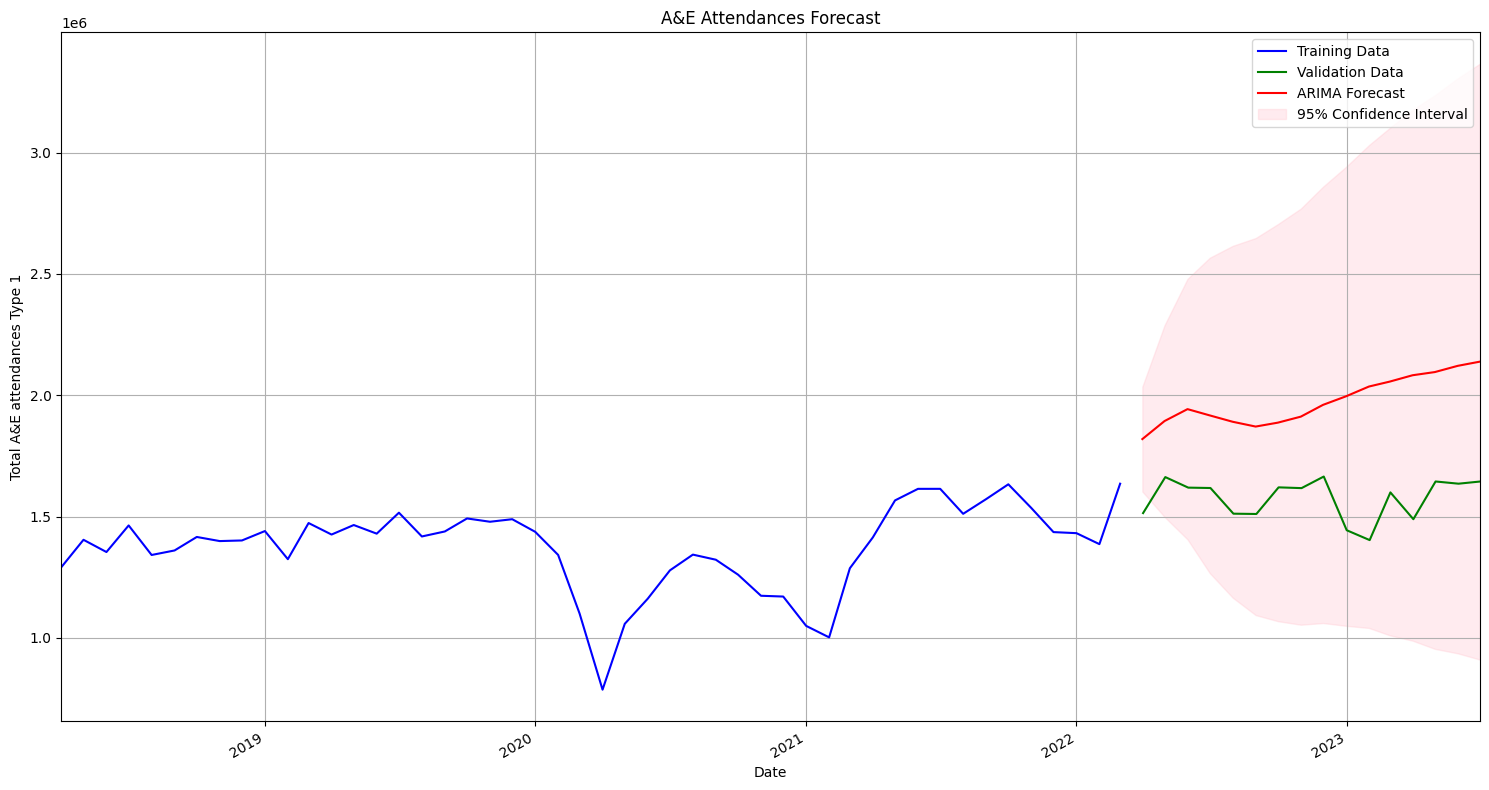


Forecast for validation period:
2022-03-31: 1819403.59
2022-04-30: 1893834.44
2022-05-31: 1942888.21
2022-06-30: 1917039.44
2022-07-31: 1890799.66
2022-08-31: 1871044.79
2022-09-30: 1887173.40
2022-10-31: 1911903.05
2022-11-30: 1960446.24
2022-12-31: 1995638.11
2023-01-31: 2035976.71
2023-02-28: 2056252.35
2023-03-31: 2082540.98
2023-04-30: 2095629.89
2023-05-31: 2121335.62
2023-06-30: 2138683.23

Root Mean Squared Error (RMSE): 418921.50


In [866]:
# Create forecast
forecast_steps = len(val_df)
forecast = best_model.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Ensure the index is in datetime format
train_df['Month'] = pd.to_datetime(train_df['Month'])
val_df['Month'] = pd.to_datetime(val_df['Month'])

# Create a date range for the forecast
last_train_date = train_df['Month'].max()
forecast_dates = pd.date_range(start=last_train_date + pd.Timedelta(days=1), periods=forecast_steps, freq='M')

# Plot
plt.figure(figsize=(15, 8))

# Plot training data
plt.plot(train_df['Month'], train_df["Total A&E attendances Type 1"], label='Training Data', color='blue')

# Plot validation data
plt.plot(val_df['Month'], val_df["Total A&E attendances Type 1"], label='Validation Data', color='green')

# Plot forecast
plt.plot(forecast_dates, forecast_mean, label='ARIMA Forecast', color='red')

# Plot confidence intervals
plt.fill_between(forecast_dates,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('A&E Attendances Forecast')
plt.xlabel('Date')
plt.ylabel('Total A&E attendances Type 1')
plt.legend()
plt.grid(True)

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Set x-axis limits to show the entire range
plt.xlim(train_df['Month'].min(), forecast_dates[-1])

plt.tight_layout()
plt.show()

# Print forecast values
print("\nForecast for validation period:")
for date, value in zip(forecast_dates, forecast_mean):
    print(f"{date.strftime('%Y-%m-%d')}: {value:.2f}")

# Calculate and print RMSE
rmse = np.sqrt(mean_squared_error(val_df["Total A&E attendances Type 1"], forecast_mean))
print(f"\nRoot Mean Squared Error (RMSE): {rmse:.2f}")


The COVID-19 pandemic has significantly impacted the patterns of NHS data, which experienced a sharp initial decrease in potential COVID-19 cases followed by a sustained reduction and fluctuations that complicate trend analysis.

This suggests that data from this period may not accurately reflect typical operational patterns, warranting its exclusion from forecasting models aimed at predicting future trends based on historical data (Harrison et al., 2021).

Furthermore, it is crucial to utilise local data for predictive modeling during the pandemic, as traditional forecasting models may fail to capture the unique dynamics introduced by COVID-19, potentially leading to misleading forecasts if pandemic-influenced data is included without proper adjustments (Mason et al., 2021).

A study protocol proposed using pre-pandemic hospital admissions data to establish a baseline for expected admissions in a "business-as-usual" scenario, indicating that excluding pandemic-affected data could enhance the accuracy of future admissions forecasts (NHS Digital, 2021).

Additionally, the onset of the pandemic complicates model validation against known observations, emphasising the need for caution when interpreting forecasts generated during this period.

Overall, the literature suggests that excluding NHS data from 2019/2020 in time series forecasting due to COVID-19 is advisable, as this period's trends do not align with typical patterns. Using pre-pandemic data can help establish more accurate baselines for future predictions.

I've therefore dropped the 19/20 data from my data and re-trained my model to assess the impact.

References

Harrison, E., et al. (2021). Analysis of temporal trends in potential COVID-19 cases reported through NHS Pathways. PMC, [online] Available at: https://pmc.ncbi.nlm.nih.gov/articles/PMC8007605/ [Accessed 6 Jan. 2025].

Mason, J., et al. (2021). Patient factors and temporal trends associated with COVID-19 in England. PMC, [online] Available at: https://pmc.ncbi.nlm.nih.gov/articles/PMC7906650/ [Accessed 6 Jan. 2025].

NHS Digital (2021). How data is supporting the COVID-19 response. [online] Available at: https://digital.nhs.uk/coronavirus/gpes-data-for-pandemic-planning-and-research [Accessed 6 Jan. 2025].

##Remove 19/20 from train_df

In [867]:
# Convert the Month column to datetime format
train_df['Month'] = pd.to_datetime(train_df['Month'], format='%d/%m/%Y')

# Define the start and end dates for the 2019/2020 financial year
start_date = pd.to_datetime('01/04/2019', format='%d/%m/%Y')
end_date = pd.to_datetime('31/03/2020', format='%d/%m/%Y')

# Filter out the rows that fall within the 2019/2020 financial year
filtered_train_df = train_df[(train_df['Month'] < start_date) | (train_df['Month'] > end_date)]

# Display the filtered DataFrame
print(filtered_train_df)


        Month  Total A&E attendances Type 1 YearMonth   Z-Score
0  2018-04-01                     1291234.0   2018-04 -0.474835
1  2018-05-01                     1404359.0   2018-05  0.174724
2  2018-06-01                     1353939.0   2018-06 -0.114786
3  2018-07-01                     1463553.0   2018-07  0.514613
4  2018-08-01                     1341774.0   2018-08 -0.184636
5  2018-09-01                     1360399.0   2018-09 -0.077693
6  2018-10-01                     1416034.0   2018-10  0.241761
7  2018-11-01                     1399064.0   2018-11  0.144320
8  2018-12-01                     1401604.0   2018-12  0.158905
9  2019-01-01                     1440351.0   2019-01  0.381388
10 2019-02-01                     1324502.0   2019-02 -0.283811
11 2019-03-01                     1473412.0   2019-03  0.571223
24 2020-04-01                      786651.0   2020-04 -3.372127
25 2020-05-01                     1058061.0   2020-05 -1.813703
26 2020-06-01                     116147

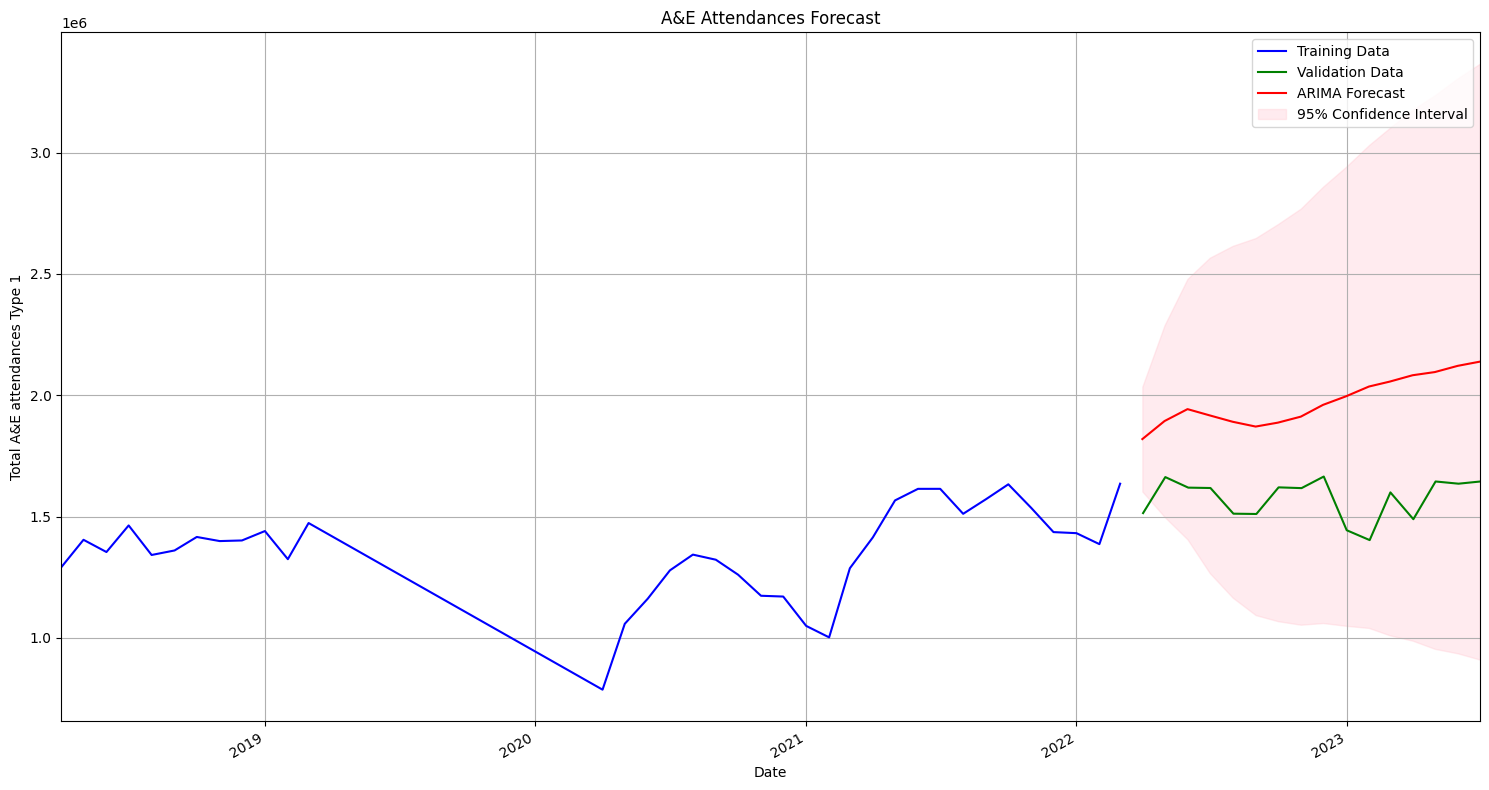


Forecast for validation period:
2022-03-31: 1819403.59
2022-04-30: 1893834.44
2022-05-31: 1942888.21
2022-06-30: 1917039.44
2022-07-31: 1890799.66
2022-08-31: 1871044.79
2022-09-30: 1887173.40
2022-10-31: 1911903.05
2022-11-30: 1960446.24
2022-12-31: 1995638.11
2023-01-31: 2035976.71
2023-02-28: 2056252.35
2023-03-31: 2082540.98
2023-04-30: 2095629.89
2023-05-31: 2121335.62
2023-06-30: 2138683.23

Root Mean Squared Error (RMSE): 418921.50


In [868]:
# Create forecast
forecast_steps = len(val_df)
forecast = best_model.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Ensure the index is in datetime format
filtered_train_df['Month'] = pd.to_datetime(filtered_train_df['Month'])
val_df['Month'] = pd.to_datetime(val_df['Month'])

# Create a date range for the forecast
last_train_date = filtered_train_df['Month'].max()
forecast_dates = pd.date_range(start=last_train_date + pd.Timedelta(days=1), periods=forecast_steps, freq='M')

# Plot
plt.figure(figsize=(15, 8))

# Plot training data
plt.plot(filtered_train_df['Month'], filtered_train_df["Total A&E attendances Type 1"], label='Training Data', color='blue')

# Plot validation data
plt.plot(val_df['Month'], val_df["Total A&E attendances Type 1"], label='Validation Data', color='green')

# Plot forecast
plt.plot(forecast_dates, forecast_mean, label='ARIMA Forecast', color='red')

# Plot confidence intervals
plt.fill_between(forecast_dates,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('A&E Attendances Forecast')
plt.xlabel('Date')
plt.ylabel('Total A&E attendances Type 1')
plt.legend()
plt.grid(True)

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Set x-axis limits to show the entire range
plt.xlim(filtered_train_df['Month'].min(), forecast_dates[-1])

plt.tight_layout()
plt.show()

# Print forecast values
print("\nForecast for validation period:")
for date, value in zip(forecast_dates, forecast_mean):
    print(f"{date.strftime('%Y-%m-%d')}: {value:.2f}")

# Calculate and print RMSE
rmse = np.sqrt(mean_squared_error(val_df["Total A&E attendances Type 1"], forecast_mean))
print(f"\nRoot Mean Squared Error (RMSE): {rmse:.2f}")


Note that the prediction is closer to the validation dataset, although could be further refined as a next step outside of this assignment.

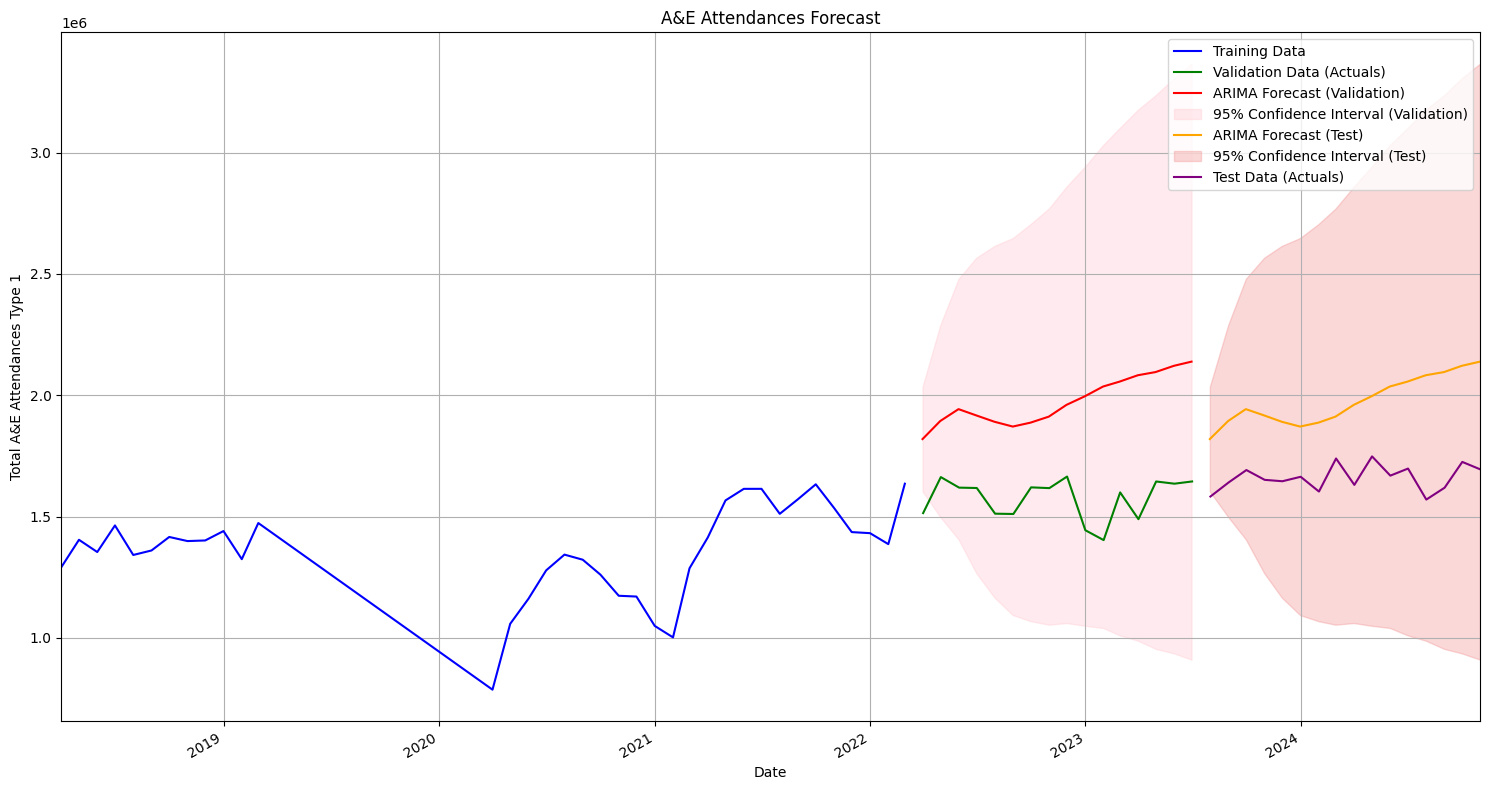

In [869]:
# Create forecast for validation data
forecast_steps_val = len(val_df)
forecast_val = best_model.get_forecast(steps=forecast_steps_val)
forecast_mean_val = forecast_val.predicted_mean
forecast_ci_val = forecast_val.conf_int()

# Create forecast for test data
forecast_steps_test = len(test_df)
forecast_test = best_model.get_forecast(steps=forecast_steps_test)
forecast_mean_test = forecast_test.predicted_mean
forecast_ci_test = forecast_test.conf_int()

# Ensure the index is in datetime format
filtered_train_df['Month'] = pd.to_datetime(filtered_train_df['Month'])
val_df['Month'] = pd.to_datetime(val_df['Month'])
test_df['Month'] = pd.to_datetime(test_df['Month'])

# Create a date range for validation forecast
last_train_date = filtered_train_df['Month'].max()
forecast_dates_val = pd.date_range(start=last_train_date + pd.Timedelta(days=1), periods=forecast_steps_val, freq='M')

# Create a date range for test forecast
forecast_dates_test = pd.date_range(start=forecast_dates_val[-1] + pd.Timedelta(days=1), periods=forecast_steps_test, freq='M')

# Plot
plt.figure(figsize=(15, 8))

# Plot training data
plt.plot(filtered_train_df['Month'], filtered_train_df["Total A&E attendances Type 1"], label='Training Data', color='blue')

# Plot validation data (actuals)
plt.plot(val_df['Month'], val_df["Total A&E attendances Type 1"], label='Validation Data (Actuals)', color='green')

# Plot validation forecast
plt.plot(forecast_dates_val, forecast_mean_val, label='ARIMA Forecast (Validation)', color='red')

# Plot confidence intervals for validation forecast
plt.fill_between(forecast_dates_val,
                 forecast_ci_val.iloc[:, 0],
                 forecast_ci_val.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% Confidence Interval (Validation)')

# Plot test forecast
plt.plot(forecast_dates_test, forecast_mean_test, label='ARIMA Forecast (Test)', color='orange')

# Plot confidence intervals for test forecast
plt.fill_between(forecast_dates_test,
                 forecast_ci_test.iloc[:, 0],
                 forecast_ci_test.iloc[:, 1],
                 color='lightcoral', alpha=0.3, label='95% Confidence Interval (Test)')

# Plot actuals from test data
plt.plot(test_df['Month'], test_df["Total A&E attendances Type 1"], label='Test Data (Actuals)', color='purple')

plt.title('A&E Attendances Forecast')
plt.xlabel('Date')
plt.ylabel('Total A&E Attendances Type 1')
plt.legend()
plt.grid(True)

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Set x-axis limits to show the entire range
plt.xlim(filtered_train_df['Month'].min(), forecast_dates_test[-1])

plt.tight_layout()
plt.show()

In [870]:

# Print forecast values for validation period
print("\nForecast for validation period:")
for date, value in zip(forecast_dates_val, forecast_mean_val):
    print(f"{date.strftime('%Y-%m-%d')}: {value:.2f}")

# Print forecast values for test period
print("\nForecast for test period:")
for date, value in zip(forecast_dates_test, forecast_mean_test):
    print(f"{date.strftime('%Y-%m-%d')}: {value:.2f}")



Forecast for validation period:
2022-03-31: 1819403.59
2022-04-30: 1893834.44
2022-05-31: 1942888.21
2022-06-30: 1917039.44
2022-07-31: 1890799.66
2022-08-31: 1871044.79
2022-09-30: 1887173.40
2022-10-31: 1911903.05
2022-11-30: 1960446.24
2022-12-31: 1995638.11
2023-01-31: 2035976.71
2023-02-28: 2056252.35
2023-03-31: 2082540.98
2023-04-30: 2095629.89
2023-05-31: 2121335.62
2023-06-30: 2138683.23

Forecast for test period:
2023-07-31: 1819403.59
2023-08-31: 1893834.44
2023-09-30: 1942888.21
2023-10-31: 1917039.44
2023-11-30: 1890799.66
2023-12-31: 1871044.79
2024-01-31: 1887173.40
2024-02-29: 1911903.05
2024-03-31: 1960446.24
2024-04-30: 1995638.11
2024-05-31: 2035976.71
2024-06-30: 2056252.35
2024-07-31: 2082540.98
2024-08-31: 2095629.89
2024-09-30: 2121335.62
2024-10-31: 2138683.23


In [871]:
# Calculate and print RMSE for validation period
rmse_val = np.sqrt(mean_squared_error(val_df["Total A&E attendances Type 1"], forecast_mean_val))
print(f"\nRoot Mean Squared Error (RMSE) for Validation Period: {rmse_val:.2f}")

# Calculate and print RMSE for test period (if applicable)
if len(test_df) == len(forecast_mean_test):
    rmse_test = np.sqrt(mean_squared_error(test_df["Total A&E attendances Type 1"], forecast_mean_test))
    print(f"Root Mean Squared Error (RMSE) for Test Period: {rmse_test:.2f}")


Root Mean Squared Error (RMSE) for Validation Period: 418921.50
Root Mean Squared Error (RMSE) for Test Period: 330191.79


##Residuals from ARIMA model

##AIC and BIC

In [872]:
# Get AIC and BIC from the best ARIMA model
aic_value = best_model.aic
bic_value = best_model.bic

# Print AIC and BIC values
print(f"AIC: {aic_value}")
print(f"BIC: {bic_value}")


AIC: 1231.6485984196968
BIC: 1248.1063709880987


The Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC) are both statistical measures utilised for model selection.

AIC estimates the relative quality of statistical models by balancing goodness of fit with model complexity; it penalises models for having too many parameters to avoid overfitting (Hyndman & Athanasopoulos, 2018).

BIC applies a stronger penalty for model complexity than AIC, making it more conservative in selecting simpler models (Randa, n.d.).

Both criteria provide a standardised approach to evaluate models, where lower values indicate better-fitting models. While AIC is preferred in situations where prediction accuracy is paramount, BIC is often favoured when the goal is to identify the true underlying model as sample sizes increase (Hyndman & Athanasopoulos, 2018; Randa, n.d.).


##Summary of time series forecasting model

The ARIMA (AutoRegressive Integrated Moving Average) model was tuned to ARIMA(5, 2, 3). The choice of ARIMA was motivated by its effectiveness in handling time series data that exhibit trends and seasonality. I checked for seasonality within the data to identify patterns that could influence attendance figures, particularly during peak times such as winter months or holiday seasons. During the modeling process, I encountered several challenges, including determining the optimal parameters for the ARIMA model and addressing potential outliers in the data.

Notably, after initially including data from the 2019/20 period, which was significantly impacted by COVID-19, I found that removing this period during the validation stage resulted in overly optimistic predictions. The Root Mean Squared Error (RMSE) for the validation period was calculated at 418,921.50, while it dropped to 330,191.79 for the test period. As I’ve not build an ARIMA time series forecasting model before, I felt that a next step would be to read more on tuning an ARIMA model and making adjustments.


# Regression Model

#Create combined dataset
Note that I could have done this in set up, but I wanted to keep this in a seperate section as I felt it flowed better.

In [873]:
# Step 1: Convert date formats and filter for November 2024
final_df['Date'] = pd.to_datetime(final_df['Date'])  # Ensure Date is in datetime format
combined_daily_sitrep_df['Period'] = pd.to_datetime(combined_daily_sitrep_df['Period'], format='%d/%m/%Y')  # Convert Period to datetime

# Filter both DataFrames for November 2024
final_df_filtered = final_df[(final_df['Date'] >= '2024-11-01') & (final_df['Date'] < '2024-12-01')]
combined_daily_sitrep_filtered = combined_daily_sitrep_df[combined_daily_sitrep_df['Type'] == 'Type 1']
combined_daily_sitrep_filtered = combined_daily_sitrep_filtered[(combined_daily_sitrep_filtered['Period'] >= '2024-11-01') &
                                                                (combined_daily_sitrep_filtered['Period'] < '2024-12-01')]

# Step 2: Pivot the combined_daily_sitrep_df to create columns from the Metric column
pivoted_combined = combined_daily_sitrep_filtered.pivot_table(index=['Period', 'Level', 'Region', 'ICB', 'Org Code', 'Org Name'],
                                                              columns='Metric',
                                                              values='Value').reset_index()

# Step 3: Merge the two DataFrames on Org Code and Date/Period
# Rename Date in final_df to match Period in pivoted_combined
final_df_filtered = final_df_filtered.rename(columns={'Date': 'Period'})

# Merge the DataFrames
merged_df = pd.merge(final_df_filtered, pivoted_combined, on=['Org Code', 'Period'], how='inner')

# Step 4: Select relevant columns for the final output
columns_to_keep = [
    'Period', 'Level', 'Region', 'ICB', 'Org Code', 'Org Name',
    'A&E attendances Type 1',
    'Attendances over 4hrs Type 1',
    'Emergency admissions via A&E - Other A&E department',
    'Emergency admissions via A&E - Type 1',
    'Emergency admissions via A&E - Type 2',
    'Other emergency admissions',
    'Patients who have waited 12+ hrs from DTA to admission',
    'Patients who have waited 4-12 hs from DTA to admission'
]

# Include all columns created from the pivoted combined_daily_sitrep_df
final_columns = columns_to_keep + [col for col in merged_df.columns if col not in columns_to_keep]

final_output = merged_df[final_columns]

# Step 5: Add columns from imd_df and population_df to final_output

# Merge imd_df into final_output on TrustCode (Org Code)
final_output = pd.merge(final_output, imd_df[['TrustCode', 'IMDScore', 'Rank1ismostdeprived']],
                         left_on='Org Code', right_on='TrustCode', how='left')

# Merge population_df into final_output on TrustCode (Org Code)
final_output = pd.merge(final_output, population_df[['TrustCode', 'Population', '65yrplus_Population']],
                         left_on='Org Code', right_on='TrustCode', how='left')

# List of columns to drop
columns_to_drop = ['TrustCode', 'index', 'Org name', 'TrustCode_x', 'TrustCode_y']

# Drop columns if they exist in the DataFrame
final_output.drop(columns=[col for col in columns_to_drop if col in final_output.columns], inplace=True)


# Display in a scrollable table
display(display_scrollable_table(final_output))


##Clean up data

In [874]:
# Check for duplicates in the 'Org Code' column
duplicates = final_output[final_output.duplicated(subset='Org Code', keep=False)]

# Display duplicates if any
if not duplicates.empty:
    print("Duplicate Org Codes found:")
    print(duplicates[['Org Code']])
else:
    print("No duplicate Org Codes found.")

# Step to check for NaN values and replace them with zero
final_output.fillna(0, inplace=True)

# Optionally, you can verify that there are no more NaN values
if final_output.isnull().values.any():
    print("There are still NaN values in the DataFrame.")
else:
    print("All NaN values have been replaced with zero.")


No duplicate Org Codes found.
All NaN values have been replaced with zero.


##Fit regression model

In [875]:
# Create regression model based on which variables impact >4hr total for Nov 24.

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Using the DataFrame named final_output

# Updated list of potential predictor variables
predictors = [
    'A&E attendances Type 1',
    'Emergency admissions via A&E - Other A&E department',
    'Emergency admissions via A&E - Type 1',
    'Emergency admissions via A&E - Type 2',
    'Other emergency admissions',
    'Patients who have waited 12+ hrs from DTA to admission',
    'Patients who have waited 4-12 hs from DTA to admission',
    'Percent waited over 12 hours',
    'Percent admissions',
    '% occupied G&A beds occupied by patients with a length of stay of - 14 or more days',
    '% occupied G&A beds occupied by patients with a length of stay of - 21 or more days',
    '% occupied G&A beds occupied by patients with a length of stay of - 7 or more days',
    'Adult G&A beds available',
    'Adult G&A beds occupied',
    'Adult G&A covid void beds',
    'Adult G&A occupancy rate',
    'Adult G&A occupancy rate adjusted for covid void beds',
    'Adult core beds available',
    'Adult critical care beds available',
    'Adult critical care beds occupied',
    'Adult critical care occupancy rate',
    'Adult escalation beds available',
    'G&A beds available',
    'G&A beds occupied',
    'G&A core beds available',
    'G&A covid void beds',
    'G&A escalation beds available',
    'G&A occupancy rate',
    'G&A occupancy rate adjusted for covid void beds',
    'Neonatal intensive care beds available',
    'Neonatal intensive care beds occupied',
    'Neonatal intensive care occupancy rate',
    'Number of G&A beds occupied by patients with a length of stay of - 14 or more days',
    'Number of G&A beds occupied by patients with a length of stay of - 21 or more days',
    'Number of G&A beds occupied by patients with a length of stay of - 7 or more days',
    'Paediatric G&A beds available',
    'Paediatric G&A beds occupied',
    'Paediatric G&A covid void beds',
    'Paediatric G&A occupancy rate',
    'Paediatric G&A occupancy rate adjusted for covid void beds',
    'Paediatric core beds available',
    'Paediatric escalation beds available',
    'Paediatric intensive care beds available',
    'Paediatric intensive care beds occupied',
    'Paediatric intensive care occupancy rate',
    # Additional columns from imd_df and population_df
    'IMDScore',
    'Rank1ismostdeprived',
    'Population',
    '65yrplus_Population'
]

# Prepare the data
X = final_output[predictors]
y = final_output['Attendances over 4hrs Type 1']

# Add a constant term to the predictors (required for statsmodels OLS regression)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors:")
print(vif)

# Print the top 5 most significant predictors
significant_predictors = model.pvalues.sort_values().head(6)[1:]  # Exclude the constant
print("\nTop 5 Most Significant Predictors:")
print(significant_predictors)

# Print the coefficients of the significant predictors
print("\nCoefficients of Significant Predictors:")
for predictor in significant_predictors.index:
    print(f"{predictor}: {model.params[predictor]:.4f}")


                                 OLS Regression Results                                 
Dep. Variable:     Attendances over 4hrs Type 1   R-squared:                       0.972
Model:                                      OLS   Adj. R-squared:                  0.951
Method:                           Least Squares   F-statistic:                     48.23
Date:                          Wed, 08 Jan 2025   Prob (F-statistic):           2.34e-38
Time:                                  16:28:24   Log-Likelihood:                -958.73
No. Observations:                           119   AIC:                             2017.
Df Residuals:                                69   BIC:                             2156.
Df Model:                                    49                                         
Covariance Type:                      nonrobust                                         
                                                                                          coef    std err     

##Summary of regression model

The regression model achieved an R-squared value of 0.972 and an adjusted R-squared of 0.951, indicating a strong fit to the data while still accounting for potential overfitting. The F-statistic of 48.23 and a p-value of 2.34×10−382.34×10−38 suggest that the overall model is statistically significant.

The top five most significant predictors identified in the regression analysis include:

- A&E attendances Type 1: Coefficient of 0.2002
- Percent waited over 12 hours: Coefficient of -170.9781
- Population aged 65 and over: Coefficient of -0.0066
- Adult escalation beds available: Coefficient of -1474.3685


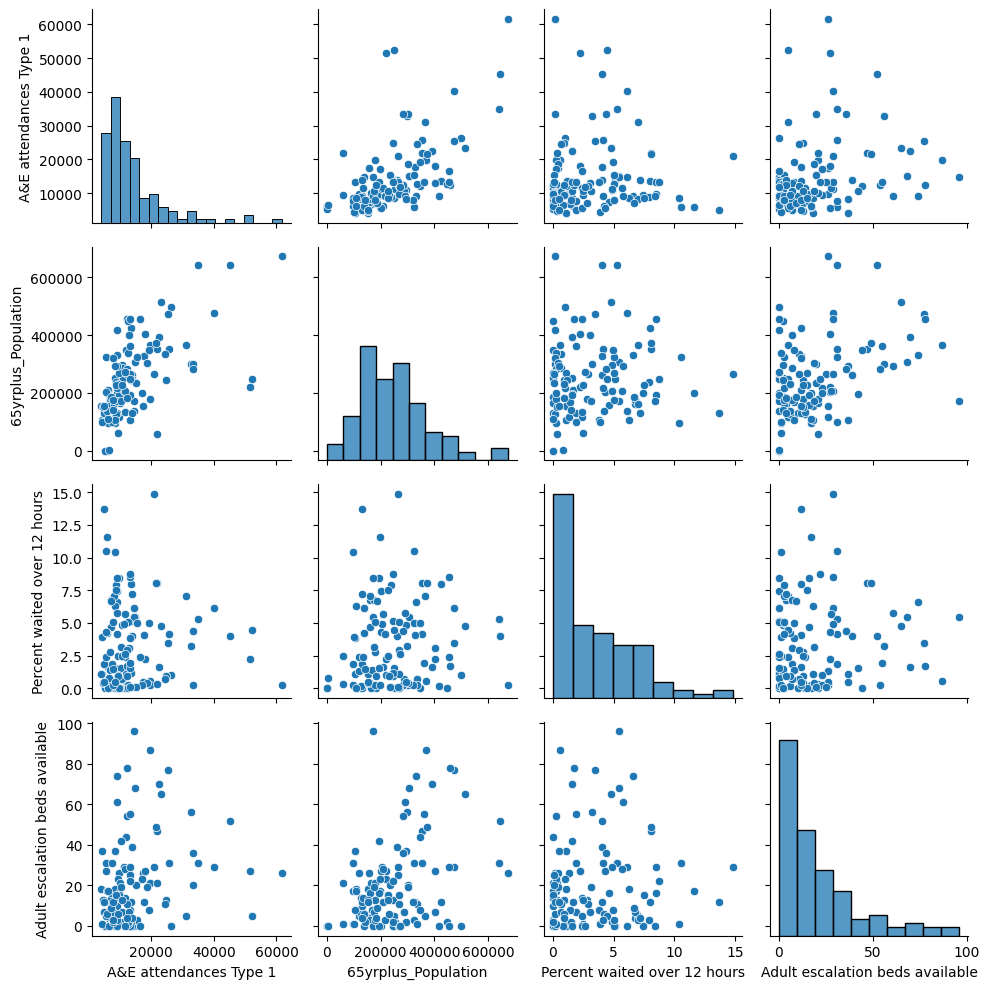

In [876]:
top_predictors = [
    'A&E attendances Type 1',
    '65yrplus_Population',
    'Percent waited over 12 hours',
    'Adult escalation beds available'
]

# Create pairplot for the selected predictors
sns.pairplot(final_output[top_predictors])
plt.tight_layout()
plt.show()


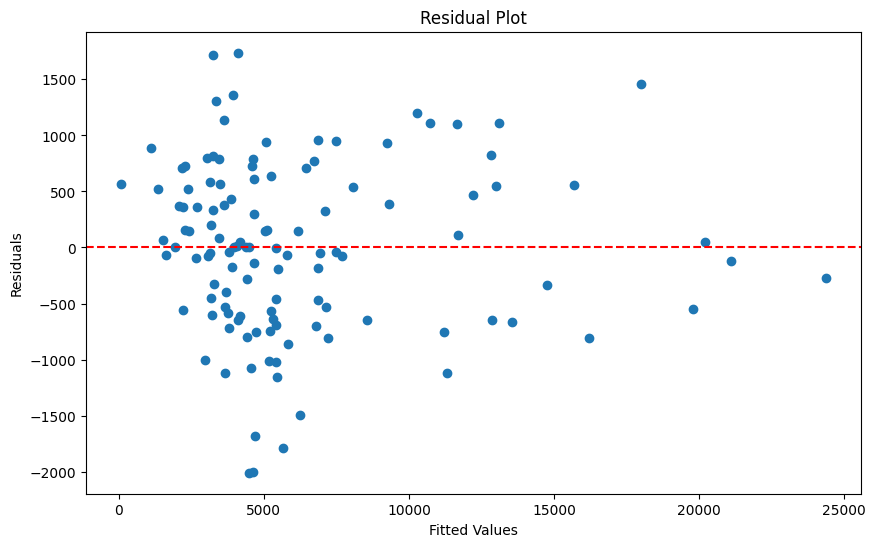

In [877]:
residuals = model.resid
fitted_values = model.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


The residuals are the differences between the observed values and the predicted values (fitted values).

Mathematically, they are calculated as:
Residual=Observed Value−Fitted Value

Horizontal Line at y=0: The dashed red line in the plot indicates where the residuals would be zero, which represents perfect predictions by the model.